# Deuxième partie : Essais des différentes approches de modélisation

## Sommaire

### Importation des librairies utilisées

### Construction modèle de clustering basique

- Chargement des données

### Clustering avec l'algorithme K-means sur les indicateurs RFM

### Evaluer la qualité du clustering obtenu avec l'algorithme K-means  utilisant les métriques telles que le coefficient de silhouette et la méthode du coude ("elbow method")

-  Coefficient de silhouette

- Méthode du coude ("elbow method") pour trouver le nombre optimal de clusters 

### Vérifier que le nombre de cluster k sélectionnés donne un sens pour l'application métier et répond au besoin métier 

- Analyse du nombre de clients par cluster

- Évaluation de la pertinence des individus dans chaque cluster

- Visualisation des clusters en 3d

- Des boxplots pour chaque cluster afin de mieux comprendre la segmentation des clients

- Ajuster le nombre de clusters à 3 pour obtenir une segmentation intéressante pour le marketing

### Création de nouveaux indicateurs plus pertinents

- importation des données nécessaires

- Merge des données nécessaires et feature enginering

- Renommer la variable de géolocalisation des vendeurs

- Renommer les variables de géolocalisation des clients

- Calculons la distance entre le client et le vendeur en créant ainsi la variable 

- Selection de nouveaux indicateurs pour le clustering

- Création de la variable durée de livraison (duree_de_livraison)

- Conversion du durée de livraison en jours

- Encodage des colonnes catégorielles

### PCA pour réduire la dimensionnalité

- Normalisation des valeurs de nos nouveaux indicateurs

 ### Clustering avec K-means sur ces nouveaux indicateurs 

- Utilisons ACP avec 3 composants pour une visualisation de ces clusters

### Tester d'autres algorithmes de clustering

- Clustering avec l'algorithme DBSCAN 

- Clustering avec l'algorithme AgglomerativeClustering

### Comparaison des 3 modèles de clustoring utilisés

### Importation des librairies utilisées

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from matplotlib.colors import ListedColormap

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import umap.umap_ as umap
from tabulate import tabulate

In [6]:
import warnings
warnings.filterwarnings("ignore")

### Construction modèle de clustering basique

- Chargement des données

In [14]:
df_rfm = pd.read_csv('./data/df_rfm.csv', low_memory = False)
df_rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,1635,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1638,1,27.19
2,0000f46a3911fa3c0805444483337064,2061,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,1845,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,1812,1,196.89
...,...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1971,1,2067.42
96092,fffea47cd6d3cc0a88bd621562a9d061,1786,1,84.58
96093,ffff371b4d645b6ecea244b27531430a,2092,1,112.46
96094,ffff5962728ec6157033ef9805bacc48,1643,1,133.69


### Clustering avec l'algorithme K-means sur les indicateurs RFM

                   recency  frequency    monetary  customer_unique_id
cluster_label                                                        
0              1903.706320   1.089693  165.419521               15854
1              1676.239954   1.075785  166.071004               25084
2              1784.810076   1.075892  161.865323               23125
3              2036.842727   1.091832  169.985368               12011
4              1571.336030   1.080412  171.599047               20022


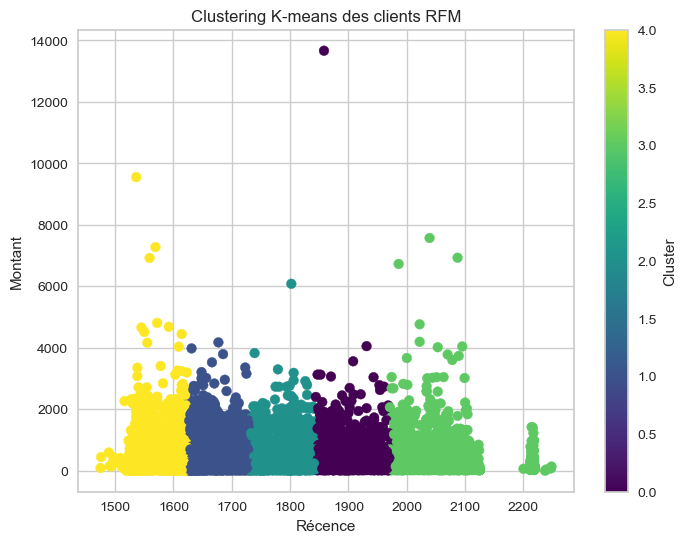

In [15]:
# Sélection des indicateurs RFM
X = df_rfm[['recency', 'frequency', 'monetary']]

# Normalisation des indicateurs RFM (si nécessaire)
# Vous pouvez utiliser différentes méthodes de normalisation selon vos besoins.
# Ici, nous utilisons la normalisation min-max comme exemple.
X_normalized = (X - X.min()) / (X.max() - X.min())

# Appliquer l'algorithme K-means avec un nombre de clusters donné
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_normalized)

# Assigner les labels de cluster à chaque client
df_rfm['cluster_label'] = kmeans.labels_

# Afficher les statistiques des clusters
cluster_stats = df_rfm.groupby('cluster_label').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'customer_unique_id': 'count'
})
print(cluster_stats)

# Visualiser les clusters sur un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_rfm['recency'], df_rfm['monetary'], c=df_rfm['cluster_label'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Récence')
plt.ylabel('Montant')
plt.title('Clustering K-means des clients RFM')
plt.savefig('cluster_k1')
plt.show()

### Evaluer la qualité du clustering obtenu avec l'algorithme K-means  utilisant les métriques telles que le coefficient de silhouette et la méthode du coude ("elbow method")

-  Coefficient de silhouette

Coefficient de silhouette moyen : 0.5231558371699799


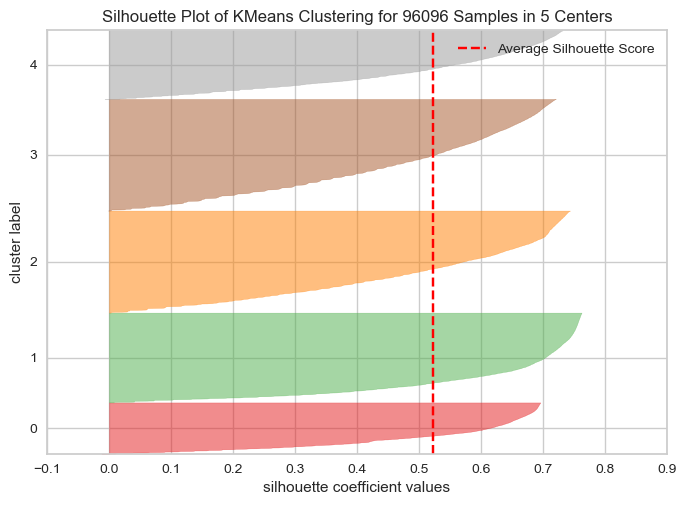

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 96096 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
# Calculer le coefficient de silhouette pour le clustering K-means
silhouette_avg = silhouette_score(X_normalized, kmeans.labels_)
print("Coefficient de silhouette moyen :", silhouette_avg)
#plt.savefig('cluster_rfm_silhoutte_A')

# Instantiate the clustering model and visualizer 
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_normalized)    # Fit the data to the visualizer
plt.savefig('cluster_rfm_silhoutte_A')
visualizer.poof()    # Draw/show/poof the data

La valeur du coefficient de silhouette tend vers 1 ce qui indique une bonne séparation entre les clusters

- Méthode du coude ("elbow method") pour trouver le nombre optimal de clusters 

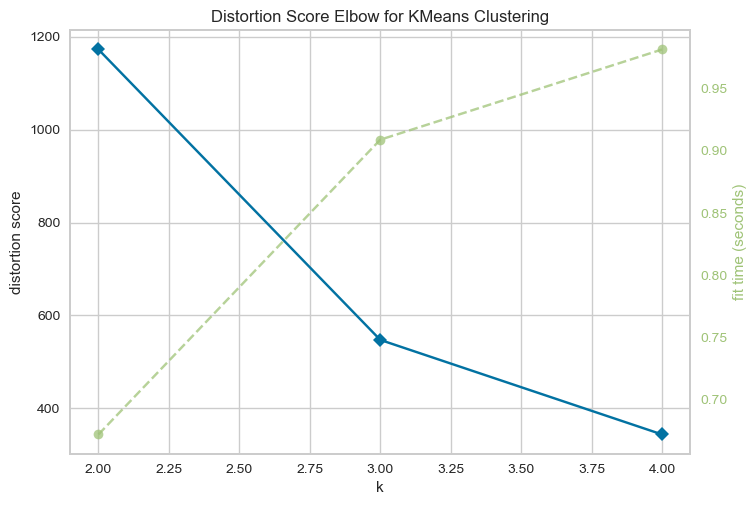

In [17]:
# Instantiate the clustering model
model = KMeans()

# Instantiate the elbow visualizer
visualizer = KElbowVisualizer(model, k=(2, 5))

# Fit the data to the visualizer
visualizer.fit(X_normalized)

# Set the save path
save_path = 'elbow_plot.png'

# Draw/show the data
visualizer.show()

# Save the figure
plt.savefig(save_path)

# Close the figure
plt.close()

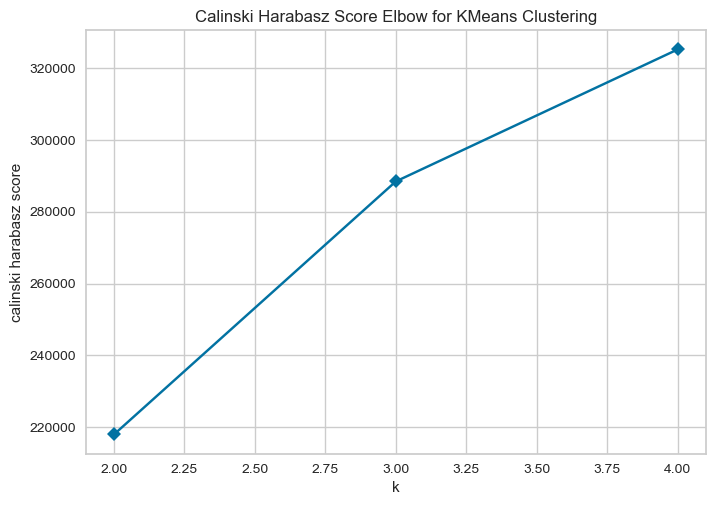

In [18]:
# Instantiate the elbow visualizer
visualizer = KElbowVisualizer(model, k=(2, 5), metric='calinski_harabasz', timings=False)

# Fit the data to the visualizer
visualizer.fit(X_normalized)

# Set the save path
save_path = 'elbow_plot2.png'

# Draw/show the data
visualizer.show()

# Save the figure
plt.savefig(save_path)

# Close the figure
plt.close()

### Vérifier que le nombre de cluster k sélectionnés donne un sens pour l'application métier et répond au besoin métier 

- Analyse du nombre de clients par cluster

In [19]:
# Compter le nombre de clients dans chaque cluster
cluster_counts = df_rfm['cluster_label'].value_counts()
print(cluster_counts)

1    25084
2    23125
4    20022
0    15854
3    12011
Name: cluster_label, dtype: int64


- Évaluation de la pertinence des individus dans chaque cluster

In [6]:
# Analyser les caractéristiques des clients dans chaque cluster
cluster_stats = df_rfm.groupby('cluster_label').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
})
print(cluster_stats)

                   recency  frequency    monetary
cluster_label                                    
0              1903.706320   1.089693  165.419521
1              1676.239954   1.075785  166.071004
2              1784.810076   1.075892  161.865323
3              2036.842727   1.091832  169.985368
4              1571.336030   1.080412  171.599047


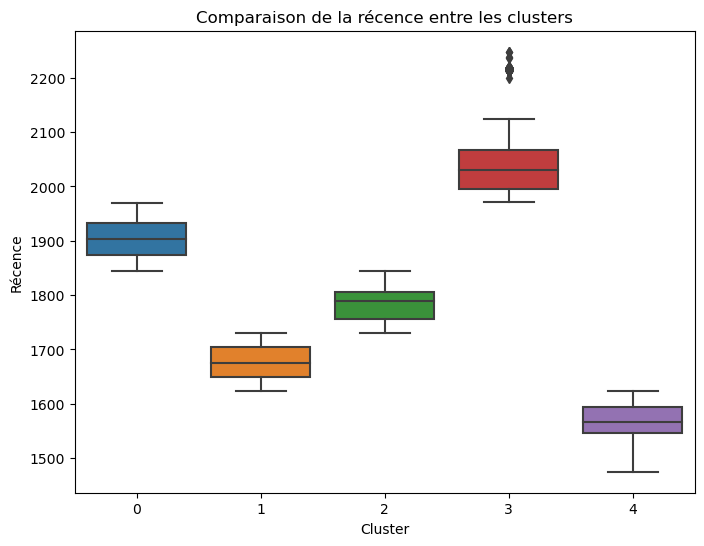

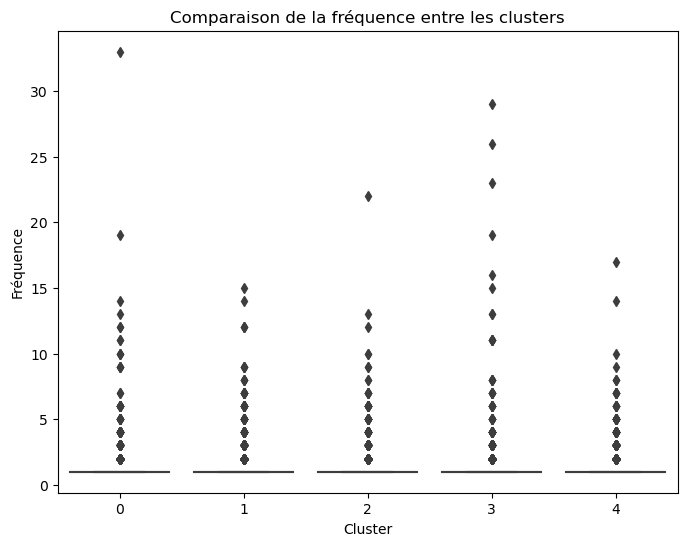

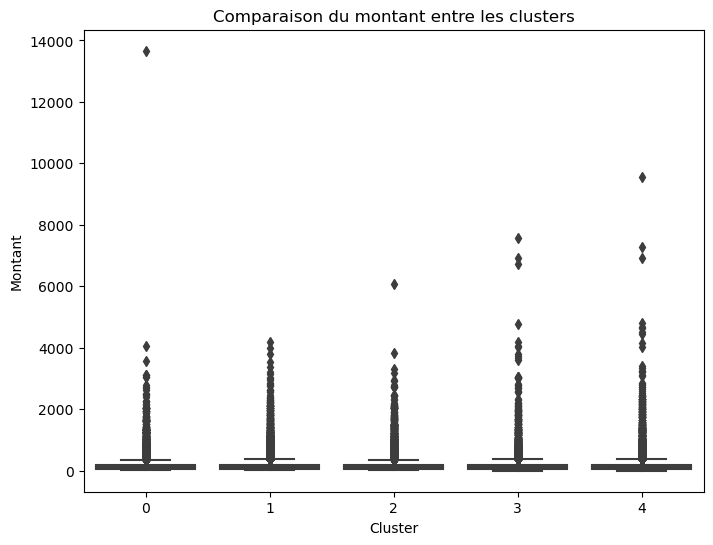

In [10]:
# Boxplot pour comparer les caractéristiques des clients dans chaque cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster_label', y='recency', data=df_rfm)
plt.xlabel('Cluster')
plt.ylabel('Récence')
plt.title('Comparaison de la récence entre les clusters')
plt.savefig('cluster_recency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster_label', y='frequency', data=df_rfm)
plt.xlabel('Cluster')
plt.ylabel('Fréquence')
plt.title('Comparaison de la fréquence entre les clusters')
plt.savefig('cluster_frequence')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster_label', y='monetary', data=df_rfm)
plt.xlabel('Cluster')
plt.ylabel('Montant')
plt.title('Comparaison du montant entre les clusters')
plt.savefig('cluster_monetary')
plt.show()

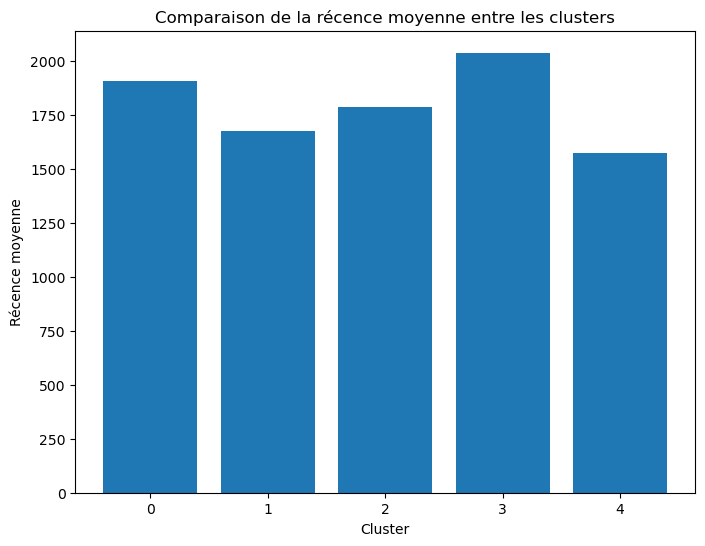

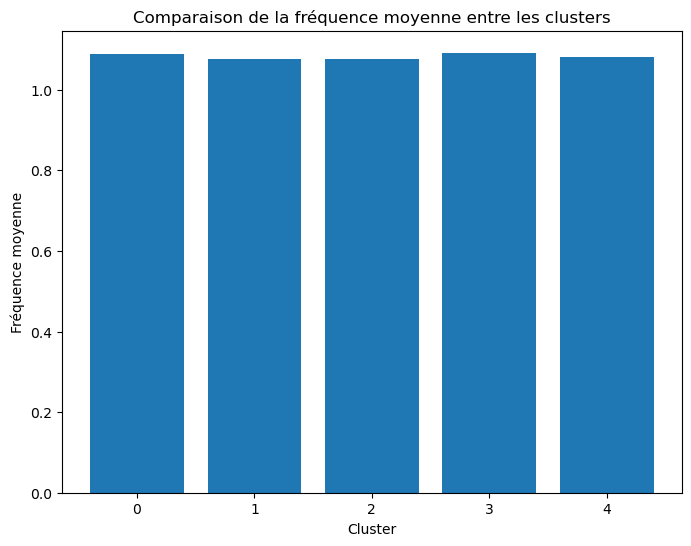

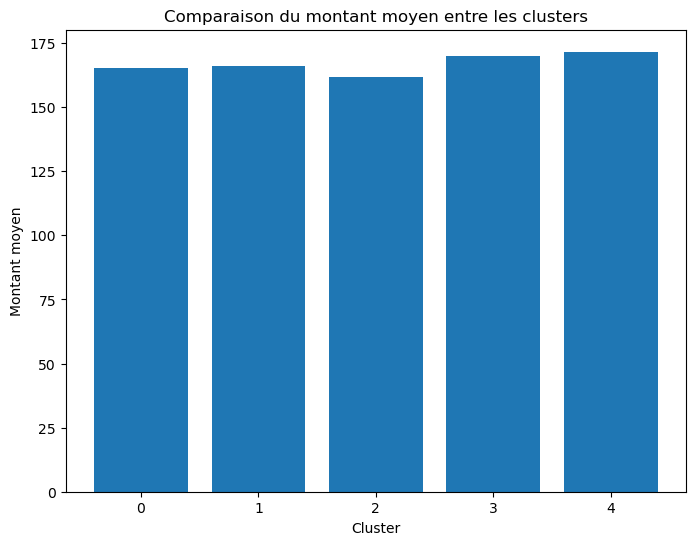

In [11]:
# Calculer les moyennes des caractéristiques des clients dans chaque cluster
cluster_means = df_rfm.groupby('cluster_label').mean().reset_index()

# Bar plot pour comparer les moyennes des caractéristiques des clients dans chaque cluster
plt.figure(figsize=(8, 6))
plt.bar(cluster_means['cluster_label'], cluster_means['recency'])
plt.xlabel('Cluster')
plt.ylabel('Récence moyenne')
plt.title('Comparaison de la récence moyenne entre les clusters')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(cluster_means['cluster_label'], cluster_means['frequency'])
plt.xlabel('Cluster')
plt.ylabel('Fréquence moyenne')
plt.title('Comparaison de la fréquence moyenne entre les clusters')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(cluster_means['cluster_label'], cluster_means['monetary'])
plt.xlabel('Cluster')
plt.ylabel('Montant moyen')
plt.title('Comparaison du montant moyen entre les clusters')
plt.show()

- Une visualisation des clusters en 3d

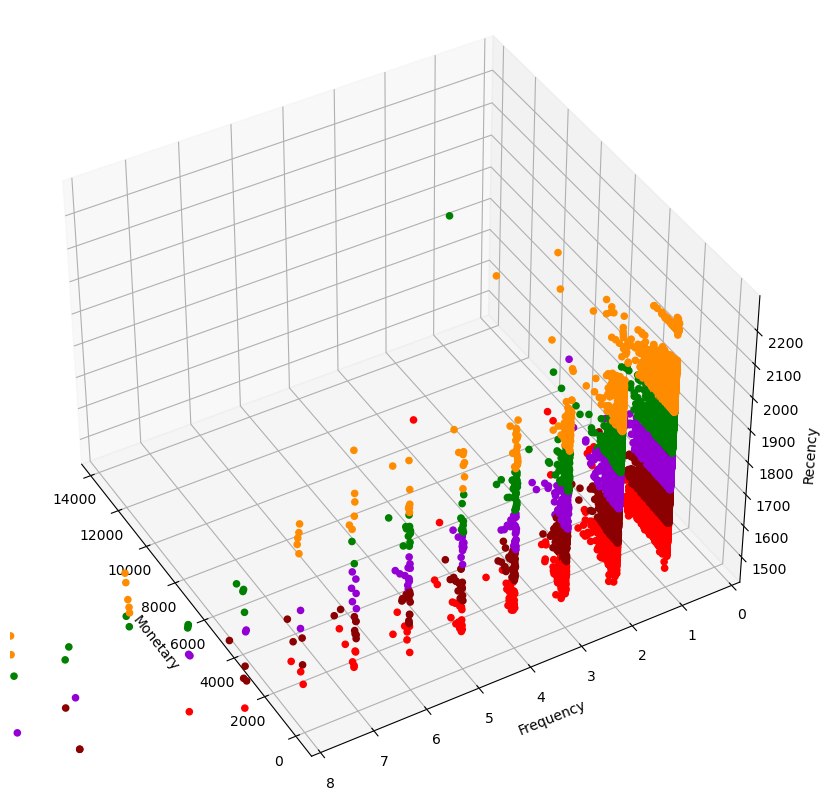

In [41]:
plt.figure(figsize=(10,10))
cmap = ListedColormap(["green",'darkred', "blue", "darkviolet",'darkorange', "red"])
ax=plt.axes(projection="3d")
ax.scatter3D(df_rfm.monetary, df_rfm.frequency, df_rfm.recency, c=df_rfm['cluster_label'], cmap=cmap,s=20, alpha=1)
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
plt.ylim(0,8)
ax.view_init(elev=40, azim=150)
plt.show()

- Des boxplots pour chaque cluster afin de mieux comprendre la segmentation des clients

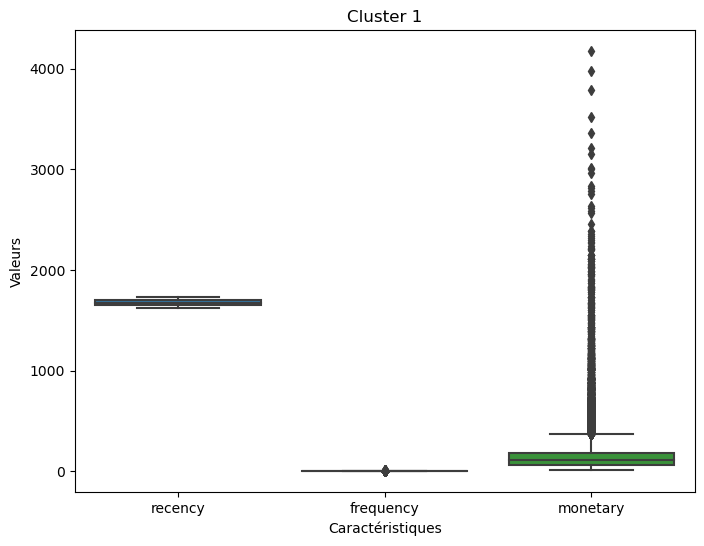

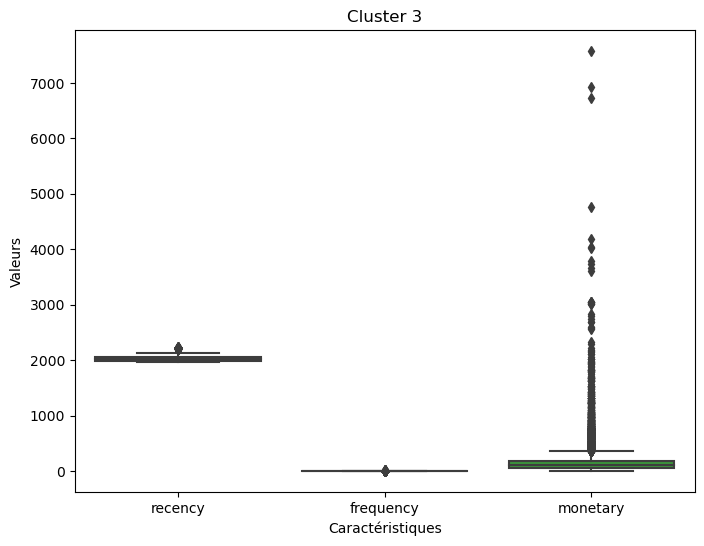

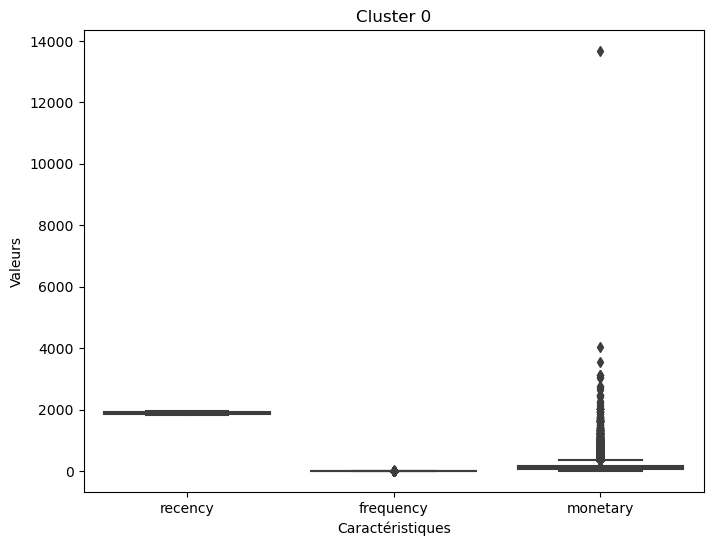

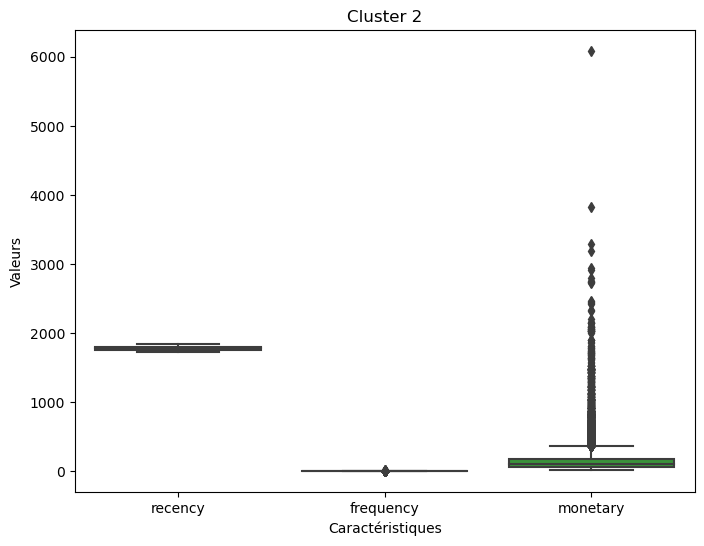

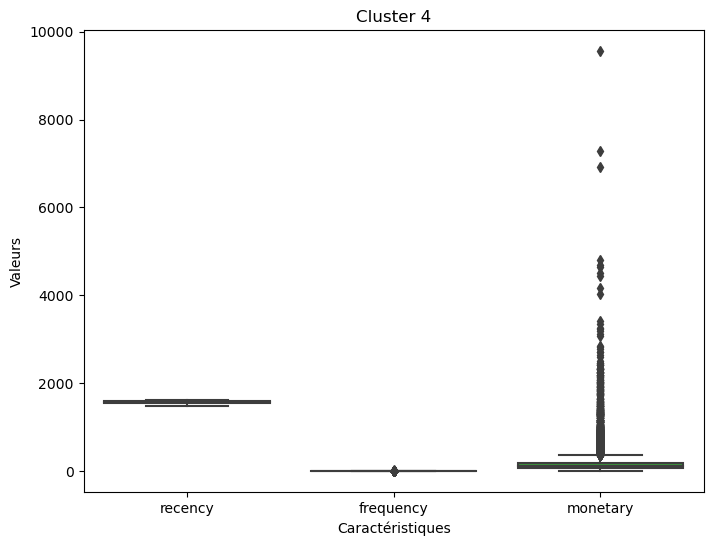

In [12]:
# Créer des sous-ensembles de données pour chaque cluster
clusters = df_rfm['cluster_label'].unique()
for cluster in clusters:
    subset = df_rfm[df_rfm['cluster_label'] == cluster]

    # Boxplot pour chaque caractéristique dans le cluster
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=subset[['recency', 'frequency', 'monetary']])
    plt.xlabel('Caractéristiques')
    plt.ylabel('Valeurs')
    plt.title('Cluster {}'.format(cluster))
    plt.savefig('cluster_rfm_boxplots')
    plt.show()

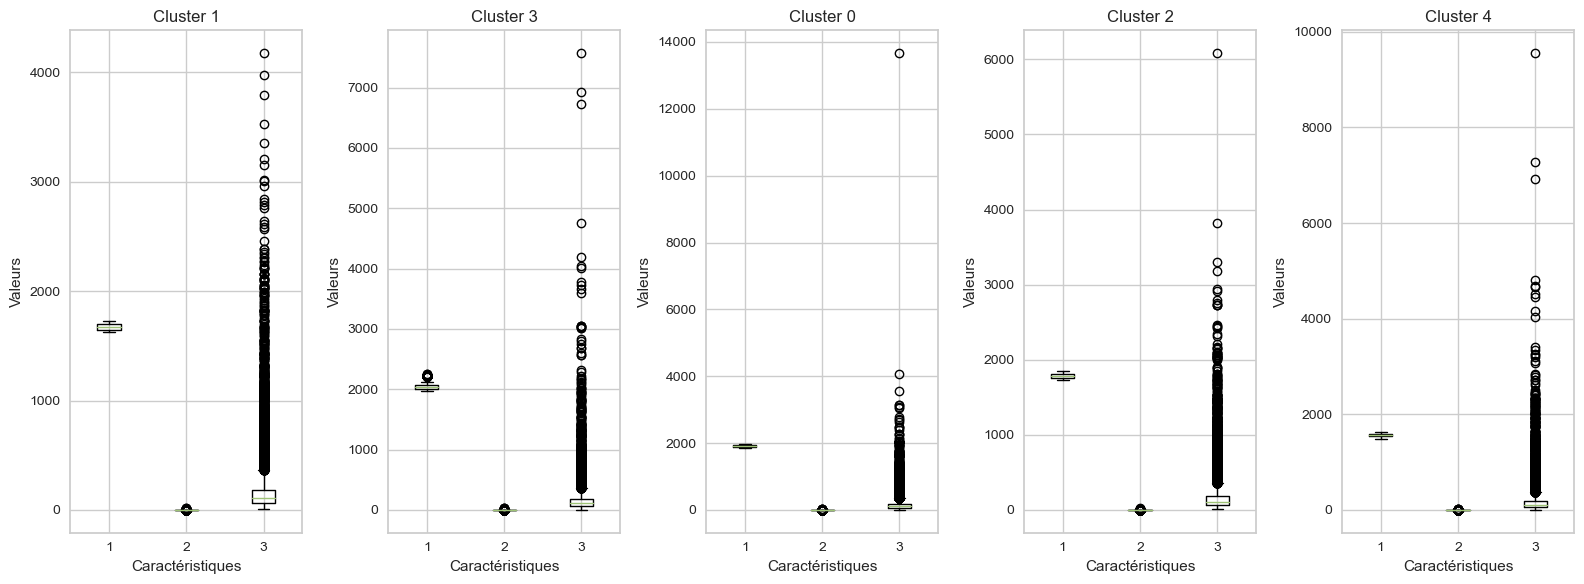

In [7]:
# Créer des sous-ensembles de données pour chaque cluster
clusters = df_rfm['cluster_label'].unique()

# Créer une grille de sous-graphiques pour regrouper les boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(16, 6))

# Parcourir chaque cluster et créer le boxplot correspondant
for i, cluster in enumerate(clusters):
    subset = df_rfm[df_rfm['cluster_label'] == cluster]

    # Boxplot pour chaque caractéristique dans le cluster
    axes[i].boxplot(subset[['recency', 'frequency', 'monetary']])
    axes[i].set_xlabel('Caractéristiques')
    axes[i].set_ylabel('Valeurs')
    axes[i].set_title('Cluster {}'.format(cluster))

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Sauvegarder l'image regroupant les boxplots des clusters
save_path = 'cluster_rfm_boxplots.png'
plt.savefig(save_path)
plt.show()

Nous contatons pour 5 clusters, une haute récence, fréquence moyenne, montant moyen. Ces clusters nous indquent que Ces clients sont probablement des acheteurs récents qui ont montré un certain niveau d'intérêt pour l'entreprise. Bien qu'ils ne passent pas des commandes fréquentes ou n'effectuent pas des dépenses importantes, leur récence élevée suggère qu'ils pourraient être en phase de découverte ou d'exploration. Ils pourraient être intéressés par vos produits ou services, mais n'ont pas encore établi une habitude d'achat régulière.

- Ajuster le nombre de clusters à 3 pour obtenir une segmentation intéressante pour le marketing

                   recency  frequency    monetary  customer_unique_id
cluster_label                                                        
0              1982.754157   1.091108  166.278638               22852
1              1610.812156   1.078073  171.088161               36722
2              1778.806254   1.077816  162.268585               36522


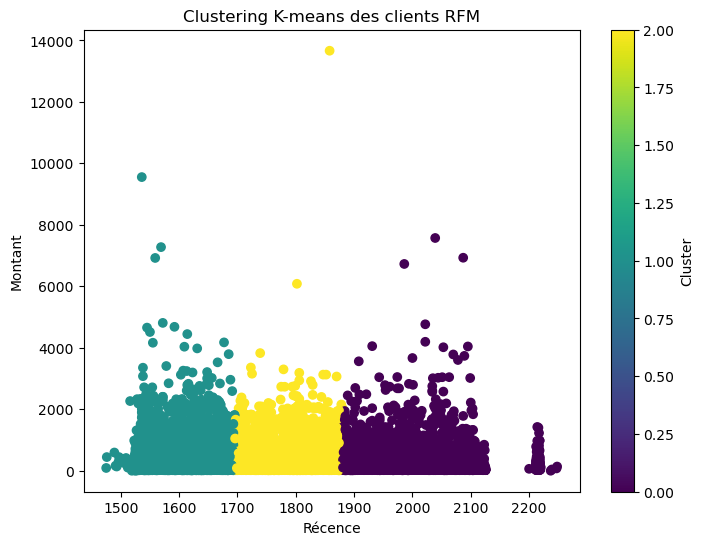

In [13]:
# Sélection des indicateurs RFM
X = df_rfm[['recency', 'frequency', 'monetary']]

# Normalisation des indicateurs RFM (si nécessaire)
X_normalized = (X - X.min()) / (X.max() - X.min())

# Appliquer l'algorithme K-means avec un nombre de clusters donné
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_normalized)

# Assigner les labels de cluster à chaque client
df_rfm['cluster_label'] = kmeans.labels_

# Afficher les statistiques des clusters
cluster_stats = df_rfm.groupby('cluster_label').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'customer_unique_id': 'count'
})
print(cluster_stats)

# Visualiser les clusters sur un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_rfm['recency'], df_rfm['monetary'], c=df_rfm['cluster_label'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Récence')
plt.ylabel('Montant')
plt.title('Clustering K-means des clients RFM')
plt.show()

In [14]:
# Calculer le coefficient de silhouette pour le clustering K-means
silhouette_avg = silhouette_score(X_normalized, kmeans.labels_)
print("Coefficient de silhouette moyen :", silhouette_avg)

Coefficient de silhouette moyen : 0.558215139745071


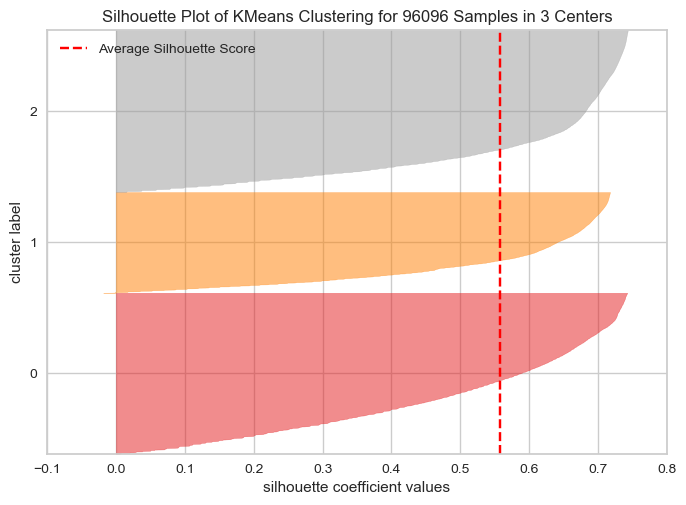

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 96096 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [4]:
# Instantiate the clustering model and visualizer 
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_normalized)    # Fit the data to the visualizer
plt.savefig('cluster_rfm_silhoutte_B')
visualizer.poof()    # Draw/show/poof the data

On arrive à ce niveau avec le RFM. Le coefficient de silhouette est amélioré  mais toujours avec un résultat passable et nous n'avons pas plus d'informations, ce n'est vraiment pas intéressant. Nous allons donc passer à d'autres indicateurs en utilisant les informations de notre base de données en esseyant de faire du clustoring en fonction d'informations intéressantes.

### Création de nouveaux indicateurs plus pertinents

- Importation des données nécessaires pour la suite du traitement

In [62]:
# Charger les datasets nécessaires

# chargement des données des commandes
olist_order_df = pd.read_csv('./data/olist_orders_dataset.csv')

# chargement des données des clients
olist_customers_df = pd.read_csv('./data/olist_customers_dataset.csv')

# chargement des données des vendeurs
olist_sellers_df = pd.read_csv('./data/olist_sellers_dataset.csv')

# chargement des données de payements de commandes
olist_order_payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')

# chargement des données de géolocalisation clients et vendeurs
olist_geolocation_df = pd.read_csv('./data/olist_geolocation_dataset.csv')

# chargement des données des articles de commmandes
olist_order_items_df = pd.read_csv('./data/olist_order_items_dataset.csv')

# chargement des données des produits
olist_products_df = pd.read_csv('./data/olist_products_dataset.csv')

In [63]:
# Définir la taille de l'échantillon souhaitée
sample_size = 30000

# Sélectionner un échantillon aléatoire de lignes dans chaque dataframe avec remplacement
sample_order = olist_order_df.sample(n=sample_size, replace=True, random_state=42)
sample_customers = olist_customers_df.sample(n=sample_size, replace=True, random_state=42)
sample_sellers = olist_sellers_df.sample(n=sample_size, replace=True, random_state=42)
sample_payments = olist_order_payments_df.sample(n=sample_size, replace=True, random_state=42)
sample_geolocation = olist_geolocation_df.sample(n=sample_size, replace=True, random_state=42)
sample_order_items = olist_order_items_df.sample(n=sample_size, replace=True, random_state=42)
sample_products = olist_products_df.sample(n=sample_size, replace=True, random_state=42)


# Supprimer les lignes avec des valeurs nulles dans chaque dataframe
clean_order = sample_order.dropna()
clean_customers = sample_customers.dropna()
clean_sellers = sample_sellers.dropna()
clean_payments = sample_payments.dropna()
clean_geolocation = sample_geolocation.dropna()
clean_order_items = sample_order_items.dropna()
clean_products = sample_products.dropna()

### Merge des données nécessaires et feature enginering

In [64]:
# Merge du dataset des vendeurs et le dataset de géolocalisation
clean_sellers = clean_sellers.merge(sample_geolocation, how = "left", left_on = "seller_zip_code_prefix", right_on = 'geolocation_zip_code_prefix')

In [65]:
clean_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e4ebd3f87bf70440014f07ddda7fbe03,19470,presidente epitacio,SP,19470.0,-21.895329,-52.163355,presidente epitácio,SP
1,e4ebd3f87bf70440014f07ddda7fbe03,19470,presidente epitacio,SP,19470.0,-21.773999,-52.106432,presidente epitácio,SP
2,e4ebd3f87bf70440014f07ddda7fbe03,19470,presidente epitacio,SP,19470.0,-21.769911,-52.110247,presidente epitacio,SP
3,e4ebd3f87bf70440014f07ddda7fbe03,19470,presidente epitacio,SP,19470.0,-21.783530,-52.111369,presidente epitacio,SP
4,e4ebd3f87bf70440014f07ddda7fbe03,19470,presidente epitacio,SP,19470.0,-21.767693,-52.112293,presidente epitacio,SP
...,...,...,...,...,...,...,...,...,...
132062,9c1c0c36cd23c20897e473901a8fb149,11702,praia grande,SP,11702.0,-24.016595,-46.438855,praia grande,SP
132063,9c1c0c36cd23c20897e473901a8fb149,11702,praia grande,SP,11702.0,-24.009473,-46.435023,praia grande,SP
132064,9c1c0c36cd23c20897e473901a8fb149,11702,praia grande,SP,11702.0,-24.018316,-46.451042,praia grande,SP
132065,9c1c0c36cd23c20897e473901a8fb149,11702,praia grande,SP,11702.0,-24.017991,-46.446144,praia grande,SP


- Renommer la variable de géolocalisation des vendeurs

In [66]:
# Renommer les variables de géolocalisation de la latitude et de la longitude du vendeur
clean_sellers.rename(columns={'geolocation_lat': 'seller_lat',
                              'geolocation_lng': 'seller_lng'},
                     inplace=True, errors='raise')

In [67]:
clean_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,seller_lat,seller_lng,geolocation_city,geolocation_state
0,e4ebd3f87bf70440014f07ddda7fbe03,19470,presidente epitacio,SP,19470.0,-21.895329,-52.163355,presidente epitácio,SP
1,e4ebd3f87bf70440014f07ddda7fbe03,19470,presidente epitacio,SP,19470.0,-21.773999,-52.106432,presidente epitácio,SP
2,e4ebd3f87bf70440014f07ddda7fbe03,19470,presidente epitacio,SP,19470.0,-21.769911,-52.110247,presidente epitacio,SP
3,e4ebd3f87bf70440014f07ddda7fbe03,19470,presidente epitacio,SP,19470.0,-21.783530,-52.111369,presidente epitacio,SP
4,e4ebd3f87bf70440014f07ddda7fbe03,19470,presidente epitacio,SP,19470.0,-21.767693,-52.112293,presidente epitacio,SP
...,...,...,...,...,...,...,...,...,...
132062,9c1c0c36cd23c20897e473901a8fb149,11702,praia grande,SP,11702.0,-24.016595,-46.438855,praia grande,SP
132063,9c1c0c36cd23c20897e473901a8fb149,11702,praia grande,SP,11702.0,-24.009473,-46.435023,praia grande,SP
132064,9c1c0c36cd23c20897e473901a8fb149,11702,praia grande,SP,11702.0,-24.018316,-46.451042,praia grande,SP
132065,9c1c0c36cd23c20897e473901a8fb149,11702,praia grande,SP,11702.0,-24.017991,-46.446144,praia grande,SP


In [68]:
# Merge du dataset des clients et le dataset de géolocalisation
clean_customers = clean_customers.merge(clean_geolocation, how = "left", left_on = "customer_zip_code_prefix", right_on = 'geolocation_zip_code_prefix')

- Renommer les variables de géolocalisation des clients

In [69]:
# Renommer les variables de géolocalisation de la latitude et de la longitude du vendeur
clean_customers.rename(columns={'geolocation_lat': 'customer_lat',
                                 'geolocation_lng': 'customer_lng'},
                        inplace=True, errors='raise')

In [70]:
clean_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,customer_lat,customer_lng,geolocation_city,geolocation_state
0,b67461e3f398c5f3350fc89cc61ab299,0414185297505b92744bff2f61522a82,44380,cruz das almas,BA,44380.0,-12.670779,-39.103550,cruz das almas,BA
1,b67461e3f398c5f3350fc89cc61ab299,0414185297505b92744bff2f61522a82,44380,cruz das almas,BA,44380.0,-12.671347,-39.100480,cruz das almas,BA
2,b67461e3f398c5f3350fc89cc61ab299,0414185297505b92744bff2f61522a82,44380,cruz das almas,BA,44380.0,-12.676461,-39.098785,cruz das almas,BA
3,b67461e3f398c5f3350fc89cc61ab299,0414185297505b92744bff2f61522a82,44380,cruz das almas,BA,44380.0,-12.670083,-39.097006,cruz das almas,BA
4,b67461e3f398c5f3350fc89cc61ab299,0414185297505b92744bff2f61522a82,44380,cruz das almas,BA,44380.0,-12.676058,-39.101983,cruz das almas,BA
...,...,...,...,...,...,...,...,...,...,...
139724,fe3a61bdb29c2b230185ba088ac71486,a8c76e74260deff03fc0ca524a83d121,90640,porto alegre,RS,90640.0,-30.060549,-51.207162,porto alegre,RS
139725,fe3a61bdb29c2b230185ba088ac71486,a8c76e74260deff03fc0ca524a83d121,90640,porto alegre,RS,90640.0,-30.039139,-51.195850,porto alegre,RS
139726,fe3a61bdb29c2b230185ba088ac71486,a8c76e74260deff03fc0ca524a83d121,90640,porto alegre,RS,90640.0,-30.041202,-51.196177,porto alegre,RS
139727,fe3a61bdb29c2b230185ba088ac71486,a8c76e74260deff03fc0ca524a83d121,90640,porto alegre,RS,90640.0,-30.054884,-51.204582,porto alegre,RS


In [71]:
# Merge des datasets commandes, clientset vendeurs
df_merged = clean_order.merge(clean_customers, how = "left", on = "customer_id").merge(clean_order_items, how = "left", on = "order_id")

# Merge des datasets articles de commandes et produits 
df_merged = df_merged.merge(clean_payments, how = "left", on = "order_id").merge(clean_sellers, how = "left", on = "seller_id").merge(clean_products, how = "left", on = "product_id")

df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,geolocation_city_y,geolocation_state_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1fbe0504bb91684a36cb3bc56b4f0171,c4149a9313bc56d51e34029d0a6b91e1,delivered,2018-07-20 09:21:40,2018-07-24 11:33:08,2018-07-25 13:37:00,2018-07-26 19:57:32,2018-07-30 00:00:00,7e16dc849b8d954febd4c2ab9a1b1c60,18085.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1fbe0504bb91684a36cb3bc56b4f0171,c4149a9313bc56d51e34029d0a6b91e1,delivered,2018-07-20 09:21:40,2018-07-24 11:33:08,2018-07-25 13:37:00,2018-07-26 19:57:32,2018-07-30 00:00:00,7e16dc849b8d954febd4c2ab9a1b1c60,18085.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1fbe0504bb91684a36cb3bc56b4f0171,c4149a9313bc56d51e34029d0a6b91e1,delivered,2018-07-20 09:21:40,2018-07-24 11:33:08,2018-07-25 13:37:00,2018-07-26 19:57:32,2018-07-30 00:00:00,7e16dc849b8d954febd4c2ab9a1b1c60,18085.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1fbe0504bb91684a36cb3bc56b4f0171,c4149a9313bc56d51e34029d0a6b91e1,delivered,2018-07-20 09:21:40,2018-07-24 11:33:08,2018-07-25 13:37:00,2018-07-26 19:57:32,2018-07-30 00:00:00,7e16dc849b8d954febd4c2ab9a1b1c60,18085.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1fbe0504bb91684a36cb3bc56b4f0171,c4149a9313bc56d51e34029d0a6b91e1,delivered,2018-07-20 09:21:40,2018-07-24 11:33:08,2018-07-25 13:37:00,2018-07-26 19:57:32,2018-07-30 00:00:00,7e16dc849b8d954febd4c2ab9a1b1c60,18085.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232139,9be6ae94773e11cec0981a4abf939445,0a056fbf5454d67770ff0787b3235200,delivered,2018-06-27 22:45:37,2018-06-28 22:49:45,2018-06-29 13:32:00,2018-07-02 19:11:45,2018-08-06 00:00:00,532fdcdb06e4266608a798f54fd35d8c,20775.0,...,teresopolis,RJ,eletrodomesticos_2,33.0,111.0,1.0,6600.0,42.0,42.0,26.0
1232140,9be6ae94773e11cec0981a4abf939445,0a056fbf5454d67770ff0787b3235200,delivered,2018-06-27 22:45:37,2018-06-28 22:49:45,2018-06-29 13:32:00,2018-07-02 19:11:45,2018-08-06 00:00:00,532fdcdb06e4266608a798f54fd35d8c,20775.0,...,teresopolis,RJ,eletrodomesticos_2,33.0,111.0,1.0,6600.0,42.0,42.0,26.0
1232141,9be6ae94773e11cec0981a4abf939445,0a056fbf5454d67770ff0787b3235200,delivered,2018-06-27 22:45:37,2018-06-28 22:49:45,2018-06-29 13:32:00,2018-07-02 19:11:45,2018-08-06 00:00:00,532fdcdb06e4266608a798f54fd35d8c,20775.0,...,teresopolis,RJ,eletrodomesticos_2,33.0,111.0,1.0,6600.0,42.0,42.0,26.0
1232142,9be6ae94773e11cec0981a4abf939445,0a056fbf5454d67770ff0787b3235200,delivered,2018-06-27 22:45:37,2018-06-28 22:49:45,2018-06-29 13:32:00,2018-07-02 19:11:45,2018-08-06 00:00:00,532fdcdb06e4266608a798f54fd35d8c,20775.0,...,teresopolis,RJ,eletrodomesticos_2,33.0,111.0,1.0,6600.0,42.0,42.0,26.0


In [72]:
df_merged = df_merged.dropna()

<AxesSubplot:>

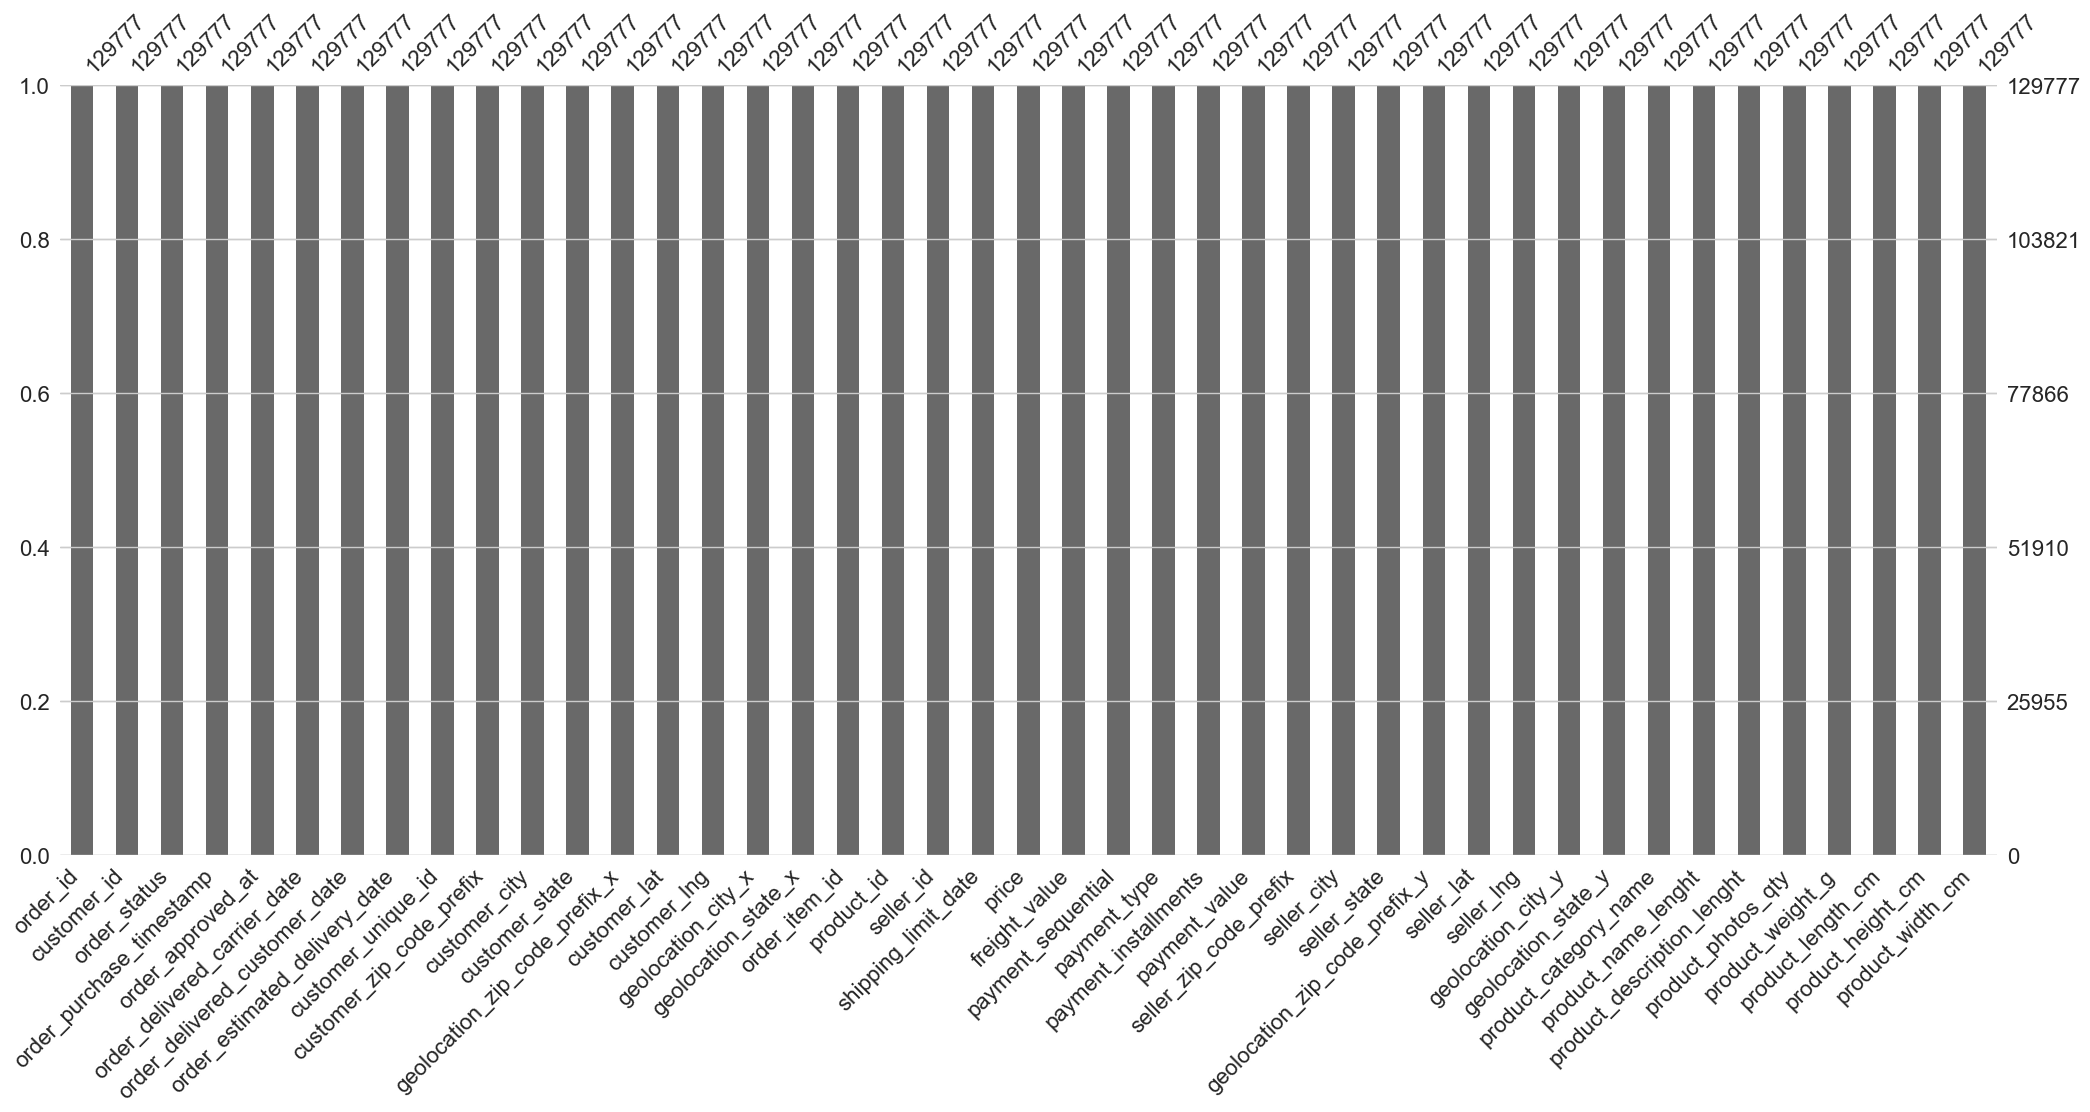

In [73]:
msno.bar(df_merged)

In [74]:
df_merged.copy()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,geolocation_city_y,geolocation_state_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1024,81d8e5d965001789e9f871f474afaad5,4f3e1edfa3261b15f51c59030d12847f,delivered,2018-03-15 18:28:28,2018-03-15 18:49:09,2018-03-21 22:14:52,2018-03-23 00:38:46,2018-03-27 00:00:00,84b5012d933ff251917aa48ff80739f0,6773.0,...,sao paulo,SP,informatica_acessorios,32.0,498.0,1.0,200.0,18.0,9.0,16.0
1025,81d8e5d965001789e9f871f474afaad5,4f3e1edfa3261b15f51c59030d12847f,delivered,2018-03-15 18:28:28,2018-03-15 18:49:09,2018-03-21 22:14:52,2018-03-23 00:38:46,2018-03-27 00:00:00,84b5012d933ff251917aa48ff80739f0,6773.0,...,sao paulo,SP,informatica_acessorios,32.0,498.0,1.0,200.0,18.0,9.0,16.0
1026,81d8e5d965001789e9f871f474afaad5,4f3e1edfa3261b15f51c59030d12847f,delivered,2018-03-15 18:28:28,2018-03-15 18:49:09,2018-03-21 22:14:52,2018-03-23 00:38:46,2018-03-27 00:00:00,84b5012d933ff251917aa48ff80739f0,6773.0,...,sao paulo,SP,informatica_acessorios,32.0,498.0,1.0,200.0,18.0,9.0,16.0
1027,81d8e5d965001789e9f871f474afaad5,4f3e1edfa3261b15f51c59030d12847f,delivered,2018-03-15 18:28:28,2018-03-15 18:49:09,2018-03-21 22:14:52,2018-03-23 00:38:46,2018-03-27 00:00:00,84b5012d933ff251917aa48ff80739f0,6773.0,...,sao paulo,SP,informatica_acessorios,32.0,498.0,1.0,200.0,18.0,9.0,16.0
1028,81d8e5d965001789e9f871f474afaad5,4f3e1edfa3261b15f51c59030d12847f,delivered,2018-03-15 18:28:28,2018-03-15 18:49:09,2018-03-21 22:14:52,2018-03-23 00:38:46,2018-03-27 00:00:00,84b5012d933ff251917aa48ff80739f0,6773.0,...,sao paulo,SP,informatica_acessorios,32.0,498.0,1.0,200.0,18.0,9.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226713,c733a4fdd58e3b29cb99b5881c10a1bc,a0304cff9fe8ea7c3fbff031132b6f8c,delivered,2018-04-04 09:30:07,2018-04-04 16:56:14,2018-04-05 21:19:21,2018-04-18 20:52:46,2018-04-27 00:00:00,02eedc8f54686a4ce9df86a5a4b6e30e,29101.0,...,porto alegre,RS,fashion_bolsas_e_acessorios,56.0,198.0,4.0,150.0,16.0,16.0,16.0
1226714,c733a4fdd58e3b29cb99b5881c10a1bc,a0304cff9fe8ea7c3fbff031132b6f8c,delivered,2018-04-04 09:30:07,2018-04-04 16:56:14,2018-04-05 21:19:21,2018-04-18 20:52:46,2018-04-27 00:00:00,02eedc8f54686a4ce9df86a5a4b6e30e,29101.0,...,porto alegre,RS,fashion_bolsas_e_acessorios,56.0,198.0,4.0,150.0,16.0,16.0,16.0
1226715,c733a4fdd58e3b29cb99b5881c10a1bc,a0304cff9fe8ea7c3fbff031132b6f8c,delivered,2018-04-04 09:30:07,2018-04-04 16:56:14,2018-04-05 21:19:21,2018-04-18 20:52:46,2018-04-27 00:00:00,02eedc8f54686a4ce9df86a5a4b6e30e,29101.0,...,porto alegre,RS,fashion_bolsas_e_acessorios,56.0,198.0,4.0,150.0,16.0,16.0,16.0
1226716,c733a4fdd58e3b29cb99b5881c10a1bc,a0304cff9fe8ea7c3fbff031132b6f8c,delivered,2018-04-04 09:30:07,2018-04-04 16:56:14,2018-04-05 21:19:21,2018-04-18 20:52:46,2018-04-27 00:00:00,02eedc8f54686a4ce9df86a5a4b6e30e,29101.0,...,porto alegre,RS,fashion_bolsas_e_acessorios,56.0,198.0,4.0,150.0,16.0,16.0,16.0


- Calculons la distance entre le client et le vendeur en créant ainsi la variable 

In [16]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [75]:
# Importer le module géodésique de la bibliothèque geopy
from geopy.distance import geodesic

# Calculer la distance entre les clients et les vendeurs
df_merged['distance_km_customer_seller'] = df_merged.apply(lambda row: geodesic((row['customer_lat'], row['customer_lng']), (row['seller_lat'], row['seller_lng'])).km, axis=1)

# Afficher le DataFrame avec la distance calculée
print(df_merged[['customer_id', 'seller_id', 'distance_km_customer_seller']])

                              customer_id                         seller_id  \
1024     4f3e1edfa3261b15f51c59030d12847f  96493fab2fbb13a14d0c0e8772eef5c3   
1025     4f3e1edfa3261b15f51c59030d12847f  96493fab2fbb13a14d0c0e8772eef5c3   
1026     4f3e1edfa3261b15f51c59030d12847f  96493fab2fbb13a14d0c0e8772eef5c3   
1027     4f3e1edfa3261b15f51c59030d12847f  96493fab2fbb13a14d0c0e8772eef5c3   
1028     4f3e1edfa3261b15f51c59030d12847f  96493fab2fbb13a14d0c0e8772eef5c3   
...                                   ...                               ...   
1226713  a0304cff9fe8ea7c3fbff031132b6f8c  d98eec89afa3380e14463da2aabaea72   
1226714  a0304cff9fe8ea7c3fbff031132b6f8c  d98eec89afa3380e14463da2aabaea72   
1226715  a0304cff9fe8ea7c3fbff031132b6f8c  d98eec89afa3380e14463da2aabaea72   
1226716  a0304cff9fe8ea7c3fbff031132b6f8c  d98eec89afa3380e14463da2aabaea72   
1226717  a0304cff9fe8ea7c3fbff031132b6f8c  d98eec89afa3380e14463da2aabaea72   

         distance_km_customer_seller  
1024        

- Selection de nouveaux indicateurs pour le clustering

In [76]:
new_indicators = ['customer_unique_id', 'payment_type', 'price', 'distance_km_customer_seller', 'product_category_name', 'order_purchase_timestamp', 'order_delivered_customer_date']
df_new_indicators = df_merged[new_indicators]

In [77]:
df_new_indicators.copy()

,customer_unique_id,payment_type,price,distance_km_customer_seller,product_category_name,order_purchase_timestamp,order_delivered_customer_date
1024,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,2018-03-15 18:28:28,2018-03-23 00:38:46
1025,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,2018-03-15 18:28:28,2018-03-23 00:38:46
1026,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,2018-03-15 18:28:28,2018-03-23 00:38:46
1027,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,2018-03-15 18:28:28,2018-03-23 00:38:46
1028,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,2018-03-15 18:28:28,2018-03-23 00:38:46
...,...,...,...,...,...,...,...
1226713,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1538.777880,fashion_bolsas_e_acessorios,2018-04-04 09:30:07,2018-04-18 20:52:46
1226714,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1538.349687,fashion_bolsas_e_acessorios,2018-04-04 09:30:07,2018-04-18 20:52:46
1226715,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1539.080912,fashion_bolsas_e_acessorios,2018-04-04 09:30:07,2018-04-18 20:52:46
1226716,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1538.556447,fashion_bolsas_e_acessorios,2018-04-04 09:30:07,2018-04-18 20:52:46


- Création de la variable durée de livraison (duree_de_livraison)

In [78]:
# convertir les colonnes 'order_delivered_customer_date' et 'order_purchase_timestamp' en valeurs de type datetime
df_new_indicators['order_delivered_customer_date'] = pd.to_datetime(df_new_indicators['order_delivered_customer_date'])
df_new_indicators['order_purchase_timestamp'] = pd.to_datetime(df_new_indicators['order_purchase_timestamp'])

# Création de la colonne duree_de_livraison
df_new_indicators.loc[:, 'duree_de_livraison'] = (df_new_indicators['order_delivered_customer_date'] - df_new_indicators['order_purchase_timestamp'])
# Supression de colonnes
df_new_indicators.drop(['order_purchase_timestamp', 'order_delivered_customer_date'], axis=1, inplace=True)

In [79]:
df_new_indicators

,customer_unique_id,payment_type,price,distance_km_customer_seller,product_category_name,duree_de_livraison
1024,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,7 days 06:10:18
1025,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,7 days 06:10:18
1026,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,7 days 06:10:18
1027,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,7 days 06:10:18
1028,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,7 days 06:10:18
...,...,...,...,...,...,...
1226713,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1538.777880,fashion_bolsas_e_acessorios,14 days 11:22:39
1226714,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1538.349687,fashion_bolsas_e_acessorios,14 days 11:22:39
1226715,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1539.080912,fashion_bolsas_e_acessorios,14 days 11:22:39
1226716,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1538.556447,fashion_bolsas_e_acessorios,14 days 11:22:39


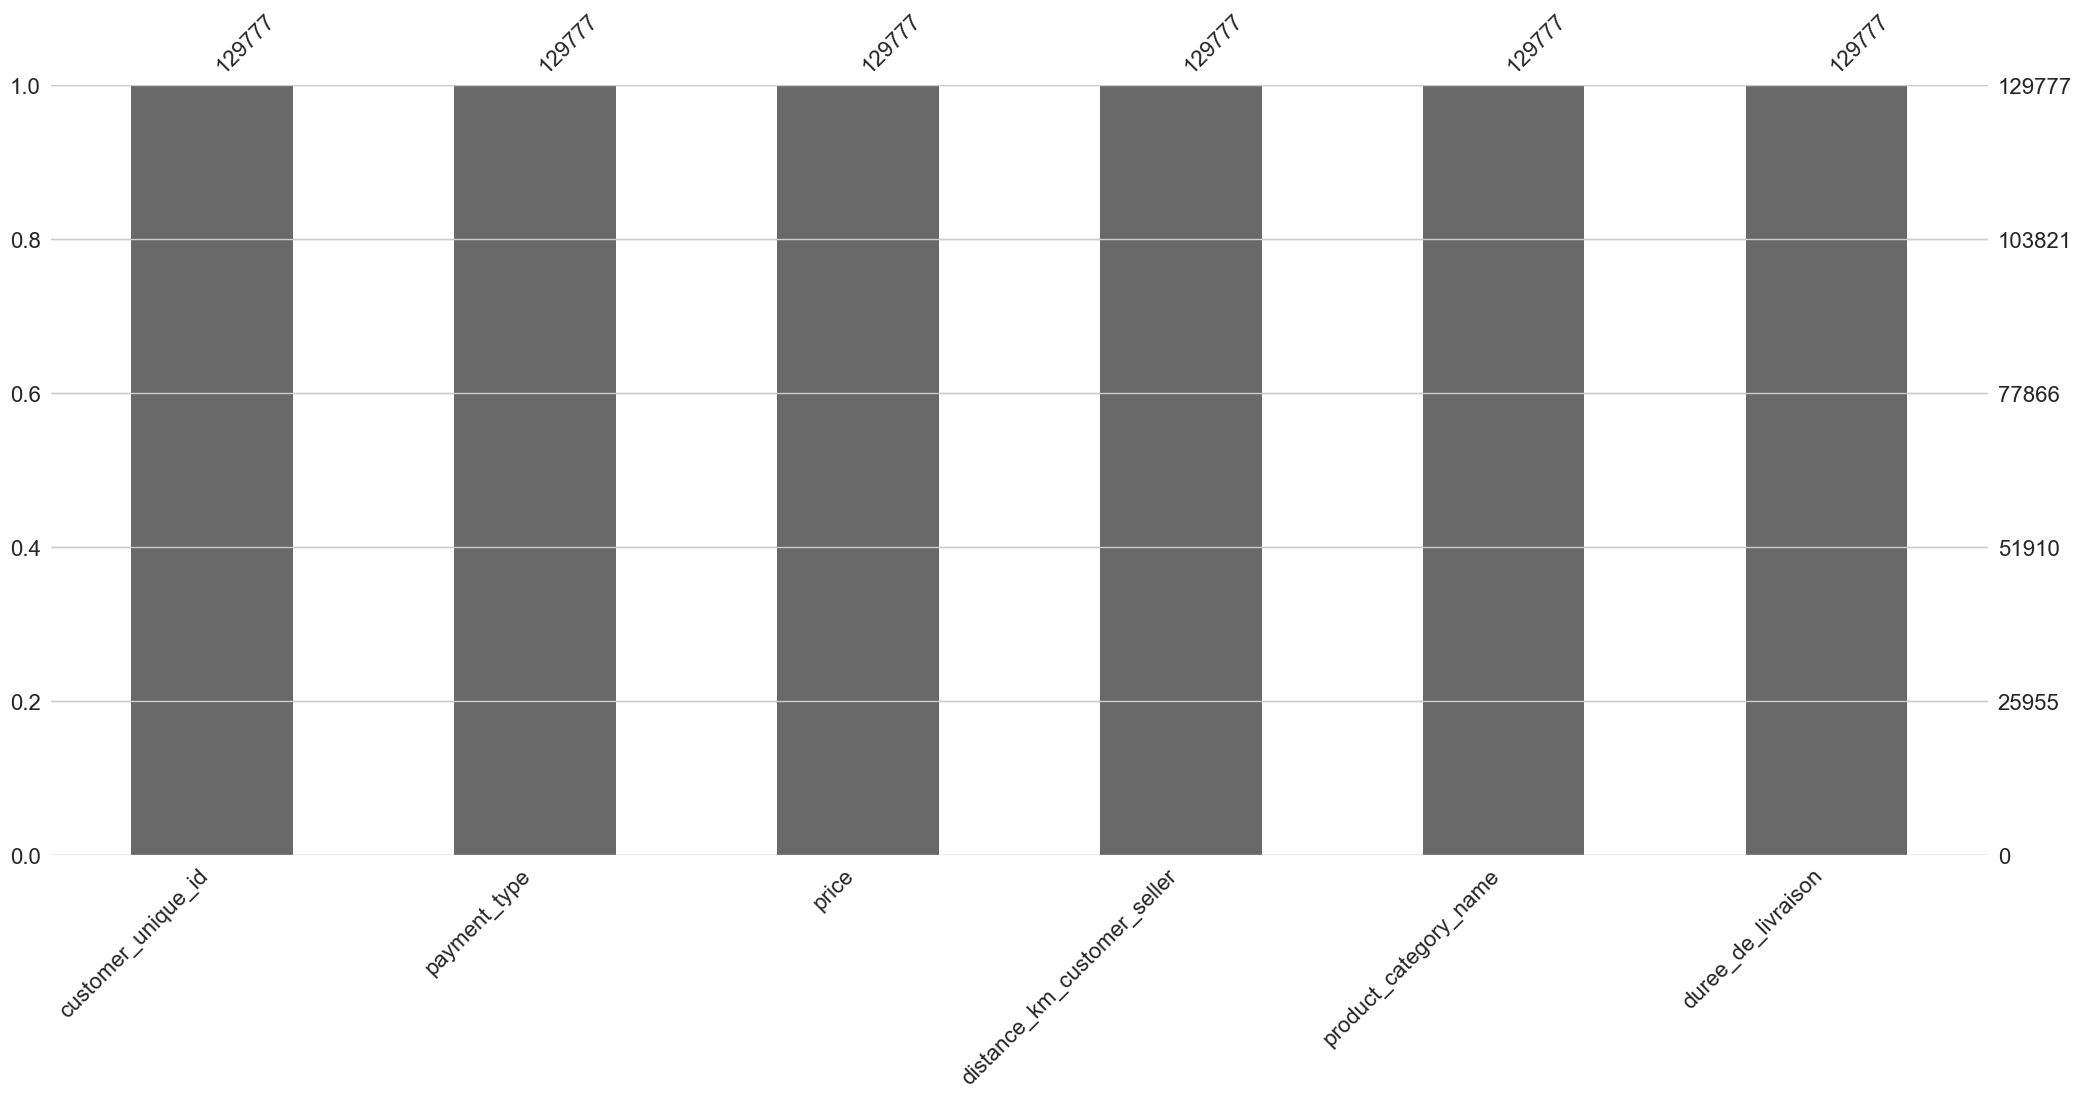

In [80]:
msno.bar(df_new_indicators)
plt.savefig('new_indicators.png')

In [35]:
# Imputation des valeurs nulles de certaines colonnes par la valeur la plus fréquente
#cols_cat = ['payment_type', 'product_category_name', 'customer_zip_code_prefix', 'seller_zip_code_prefix']
#imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
#df_new_indicators[cols_cat] = imputer.fit_transform(df_new_indicators[cols_cat])

C:\Users\tidib\AppData\Local\Temp\ipykernel_16176\1999103059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_indicators[cols_cat] = imputer.fit_transform(df_new_indicators[cols_cat])


- Conversion du durée de livraison en jours

In [38]:
# Convertir la colonne 'duree_de_livraison' en secondes
df_new_indicators['duree_de_livraison'] = df_new_indicators['duree_de_livraison'].dt.days

# Convertir la colonne en float64
#df_new_indicators['duree_de_livraison'] = df_new_indicators['duree_de_livraison'].astype('float64')

In [39]:
df_new_indicators

,customer_unique_id,payment_type,price,distance_km_customer_seller,product_category_name,duree_de_livraison
1024,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,7
1025,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,7
1026,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,7
1027,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,7
1028,84b5012d933ff251917aa48ff80739f0,credit_card,269.00,8.975321,informatica_acessorios,7
...,...,...,...,...,...,...
1226713,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1538.777880,fashion_bolsas_e_acessorios,14
1226714,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1538.349687,fashion_bolsas_e_acessorios,14
1226715,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1539.080912,fashion_bolsas_e_acessorios,14
1226716,02eedc8f54686a4ce9df86a5a4b6e30e,debit_card,29.99,1538.556447,fashion_bolsas_e_acessorios,14


In [24]:
#msno.bar(df_new_indicators)

- Encodage des colonnes catégorielles

In [40]:
# Colonnes  à encoder
cols_cat_e = ['payment_type', 'product_category_name']

# Encodage des Colonnes en utilisant la classe << LabelEncoder >>
le = LabelEncoder()
df_new_indicators['payment_type_encoded'] = le.fit_transform(df_new_indicators['payment_type'])
df_new_indicators['product_category_name_encoded'] = le.fit_transform(df_new_indicators['product_category_name'])

# Suppression des colonnes catégorielles initiales qui ne seront plus utiles
df_new_indicators.drop(cols_cat_e, axis=1, inplace=True)

In [41]:
df_new_indicators

,customer_unique_id,price,distance_km_customer_seller,duree_de_livraison,payment_type_encoded,product_category_name_encoded
1024,84b5012d933ff251917aa48ff80739f0,269.00,8.975321,7,1,21
1025,84b5012d933ff251917aa48ff80739f0,269.00,8.975321,7,1,21
1026,84b5012d933ff251917aa48ff80739f0,269.00,8.975321,7,1,21
1027,84b5012d933ff251917aa48ff80739f0,269.00,8.975321,7,1,21
1028,84b5012d933ff251917aa48ff80739f0,269.00,8.975321,7,1,21
...,...,...,...,...,...,...
1226713,02eedc8f54686a4ce9df86a5a4b6e30e,29.99,1538.777880,14,2,18
1226714,02eedc8f54686a4ce9df86a5a4b6e30e,29.99,1538.349687,14,2,18
1226715,02eedc8f54686a4ce9df86a5a4b6e30e,29.99,1539.080912,14,2,18
1226716,02eedc8f54686a4ce9df86a5a4b6e30e,29.99,1538.556447,14,2,18


### PCA pour réduire la dimensionnalité

- Normalisation des valeurs de nos nouveaux indicateurs

In [48]:
# Sélectionner les colonnes à normaliser
columns_to_normalize = ['price', 'distance_km_customer_seller', 'duree_de_livraison', 'payment_type_encoded', 'product_category_name_encoded']

# Créer une copie du DataFrame avec les colonnes sélectionnées
X = df_new_indicators[columns_to_normalize].copy()

# Créer une instance du scaler de standardisation
scaler = StandardScaler()

# Appliquer la standardisation sur les colonnes sélectionnées
X_normalized = scaler.fit_transform(X)

In [51]:
pca = PCA().fit(X_normalized)
pcaratio = pca.explained_variance_ratio_
trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
data = [trace]
layout = dict(title="Écart expliqué par PCA || 90 % atteint à 3 composants")
fig = dict(data=data, layout=layout)
plt.savefig('PCA_variance_expliquée.png')
iplot(fig)

<Figure size 800x550 with 0 Axes>

 ### Clustering avec K-means sur ces nouveaux indicateurs 

                    price  distance_km_customer_seller  duree_de_livraison  \
cluster_label                                                                
0               49.563349                  1278.634768           12.279398   
1               82.109306                   444.071200           12.275894   
2               98.010721                   419.768203            8.145240   
3               79.387544                   902.800611           29.600588   
4              507.924751                   631.731956            9.723595   

               payment_type_encoded  product_category_name_encoded  \
cluster_label                                                        
0                          2.135490                      15.774146   
1                          0.607158                      30.637030   
2                          0.854294                      11.008207   
3                          0.976912                      17.188971   
4                          0.5806

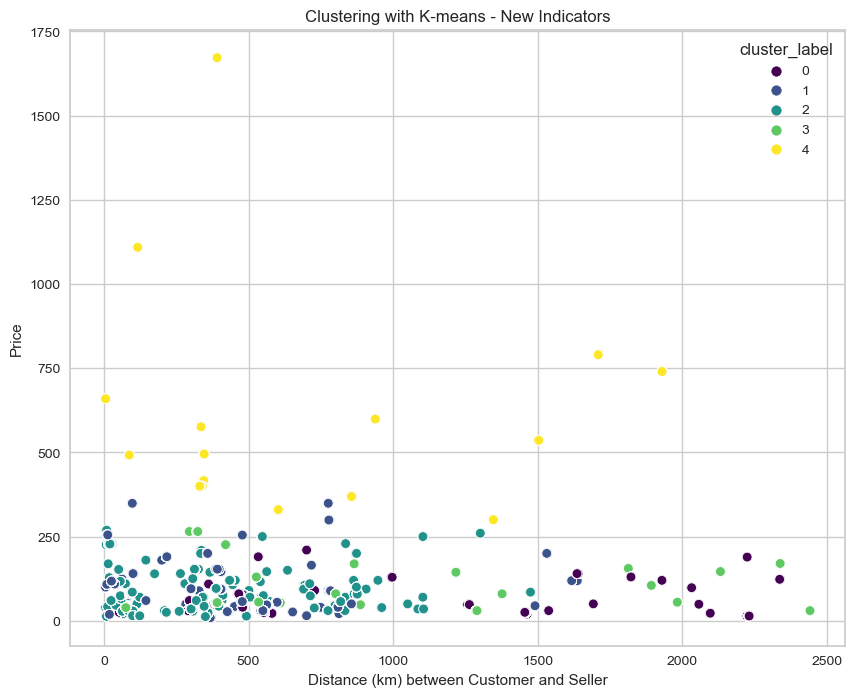

In [49]:
# Apply K-means clustering on the new indicators
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_normalized)

# Assign cluster labels to each data point
df_new_indicators['cluster_label'] = kmeans.labels_

# Display cluster statistics
cluster_stats = df_new_indicators.groupby('cluster_label').agg({
    'price': 'mean',
    'distance_km_customer_seller': 'mean',
    'duree_de_livraison': 'mean',
    'payment_type_encoded': 'mean',
    'product_category_name_encoded': 'mean',
    'customer_unique_id': 'count'
})
print(cluster_stats)

# Visualize the clusters on a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_new_indicators, x='distance_km_customer_seller', y='price', hue='cluster_label', palette='viridis')
plt.xlabel('Distance (km) between Customer and Seller')
plt.ylabel('Price')
plt.title('Clustering with K-means - New Indicators')
plt.show()

- Utilisons ACP avec 3 composants pour une visualisation de ces clusters

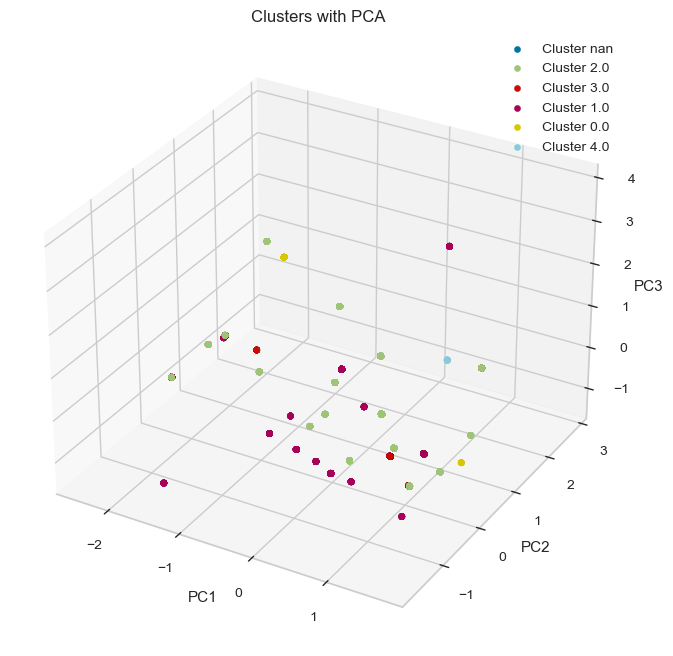

In [52]:
# Appliquer PCA avec 3 composants
pca = PCA(n_components=(3))
X_pca = pca.fit_transform(X_normalized)

# Add cluster labels to the DataFrame
df_new_indicators['cluster_label'] = kmeans.labels_

# Create a DataFrame for the PCA data
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['cluster_label'] = df_new_indicators['cluster_label']

# Visualize the clusters with PCA using three components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in df_pca['cluster_label'].unique():
    ax.scatter(df_pca[df_pca['cluster_label'] == label]['PC1'], df_pca[df_pca['cluster_label'] == label]['PC2'], df_pca[df_pca['cluster_label'] == label]['PC3'], label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters with PCA')
ax.legend()
plt.savefig('Clusters_K_view_PCA.png')
plt.show()

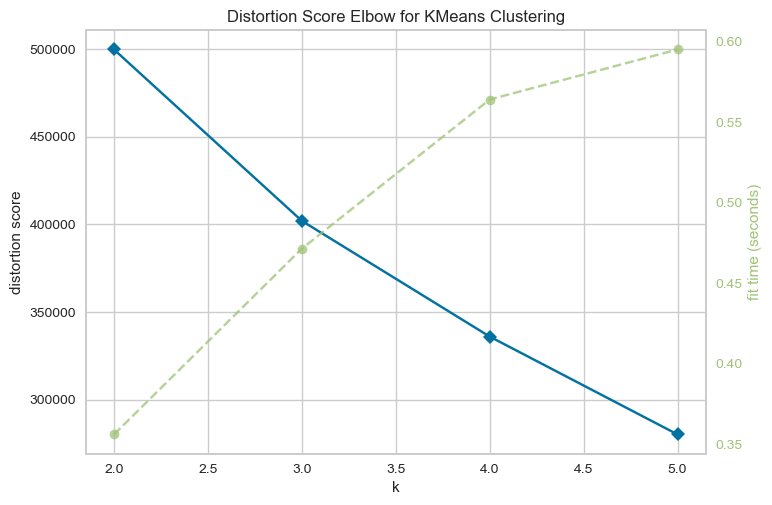

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X_normalized)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

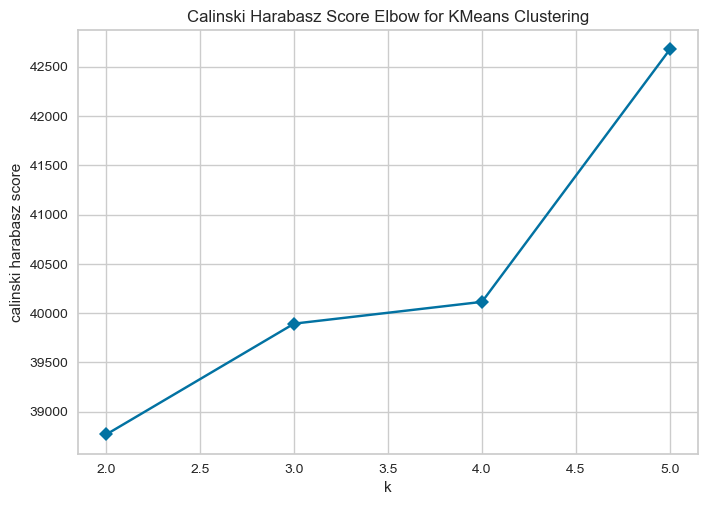

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [54]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6), metric='calinski_harabasz', timings=False)

visualizer.fit(X_normalized)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

### Tester d'autres algorithmes de clustering

- Clustering avec l'algorithme DBSCAN 

129777
0
Index(['customer_unique_id', 'price', 'distance_km_customer_seller',
       'duree_de_livraison', 'payment_type_encoded',
       'product_category_name_encoded'],
      dtype='object')
129777
129777
                       price  distance_km_customer_seller  duree_de_livraison  \
cluster_label_dbscan                                                            
0                     269.00                     8.975321                 7.0   
1                      28.38                   306.764425                12.0   
2                     179.90                   144.909842                 6.0   
3                     250.00                   546.418406                13.0   
4                     250.00                   544.017753                13.0   
...                      ...                          ...                 ...   
389                    84.90                    97.460745                 7.0   
390                    84.90                    92.653797      

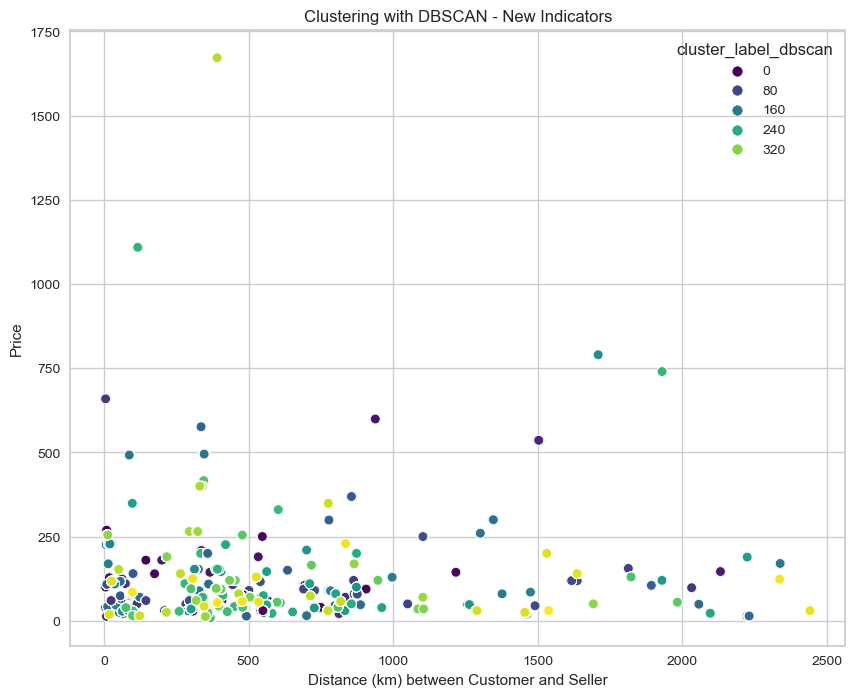

In [26]:
# Vérifier la longueur de l'index
print(len(df_new_indicators))

# Vérifier les duplicatas dans l'index
print(df_new_indicators.index.duplicated().sum())

# Supprimer les duplicatas de l'index si nécessaire
df_new_indicators = df_new_indicators[~df_new_indicators.index.duplicated()]

# Vérifier les colonnes disponibles dans le DataFrame
print(df_new_indicators.columns)

# Sélectionner les colonnes à utiliser
columns = ['price', 'distance_km_customer_seller', 'duree_de_livraison', 'payment_type_encoded', 'product_category_name_encoded']

# Créer une copie du DataFrame avec les colonnes sélectionnées
df_selected = df_new_indicators[columns].copy()

# Vérifier la longueur des valeurs des colonnes
print(len(df_selected))

# Appliquer l'algorithme DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Vérifier la longueur de l'index après le fitting
print(len(df_selected))

# Restaurer l'index du DataFrame
df_selected.reset_index(drop=True, inplace=True)

# Appliquer le clustering
labels = dbscan.fit_predict(df_selected)

# Ajouter les labels de cluster au DataFrame
df_new_indicators['cluster_label_dbscan'] = labels

# Afficher les statistiques des clusters
cluster_stats = df_new_indicators.groupby('cluster_label_dbscan').agg({
    'price': 'mean',
    'distance_km_customer_seller': 'mean',
    'duree_de_livraison': 'mean',
    'payment_type_encoded': 'mean',
    'product_category_name_encoded': 'mean',
    'customer_unique_id': 'count'
})
print(cluster_stats)

# Visualiser les clusters sur un scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_new_indicators, x='distance_km_customer_seller', y='price', hue='cluster_label_dbscan', palette='viridis')
plt.xlabel('Distance (km) between Customer and Seller')
plt.ylabel('Price')
plt.title('Clustering with DBSCAN - New Indicators')
plt.show()

                           price  distance_km_customer_seller  \
cluster_label_dbscan                                            
-1                    116.100955                   590.706180   
 0                     28.380000                   306.715902   
 1                    250.000000                   546.423770   
 2                     29.990000                   549.495768   
 3                     77.080000                   482.723234   
 4                    104.900000                   693.378130   
 5                     94.000000                   692.530843   
 6                     94.000000                   690.247099   
 7                    249.900000                  1104.008181   
 8                     69.900000                   544.056189   
 9                     69.900000                   544.056189   
 10                   139.990000                   100.899238   
 11                    64.900000                    62.828753   
 12                    64

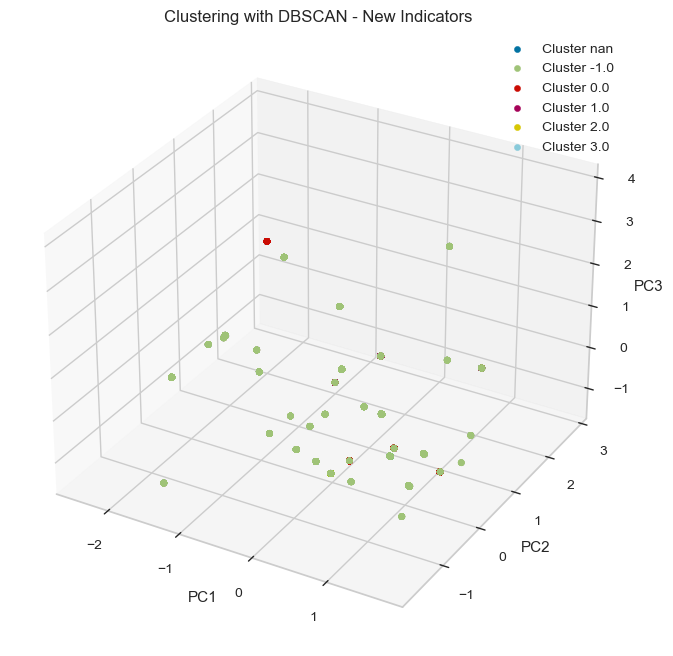

In [56]:
# Supprimer les duplicatas de l'index si nécessaire
df_new_indicators = df_new_indicators[~df_new_indicators.index.duplicated()]

# Sélectionner les colonnes à utiliser
columns = ['price', 'distance_km_customer_seller', 'duree_de_livraison', 'payment_type_encoded', 'product_category_name_encoded']

# Créer une copie du DataFrame avec les colonnes sélectionnées
df_selected = df_new_indicators[columns].copy()

# Appliquer l'algorithme DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=500)

# Appliquer le clustering
labels = dbscan.fit_predict(df_selected)

# Ajouter les labels de cluster au DataFrame
df_new_indicators['cluster_label_dbscan'] = labels

# Afficher les statistiques des clusters
cluster_stats = df_new_indicators.groupby('cluster_label_dbscan').agg({
    'price': 'mean',
    'distance_km_customer_seller': 'mean',
    'duree_de_livraison': 'mean',
    'payment_type_encoded': 'mean',
    'product_category_name_encoded': 'mean',
    'customer_unique_id': 'count'
})
print(cluster_stats)

# Sélectionner les colonnes pour l'analyse PCA
columns_pca = ['price', 'distance_km_customer_seller', 'duree_de_livraison', 'payment_type_encoded', 'product_category_name_encoded']
X_pca = df_new_indicators[columns_pca]

# Normaliser les données pour PCA
scaler = StandardScaler()
X_scaled_pca = scaler.fit_transform(X_pca)

# Appliquer PCA avec 3 composants
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled_pca)

# Créer un DataFrame pour les données PCA
df_pca = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca['cluster_label_dbscan'] = df_new_indicators['cluster_label_dbscan']

# Visualiser les clusters sur un scatter plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in df_pca['cluster_label_dbscan'].unique():
    ax.scatter(df_pca[df_pca['cluster_label_dbscan'] == label]['PC1'],
               df_pca[df_pca['cluster_label_dbscan'] == label]['PC2'],
               df_pca[df_pca['cluster_label_dbscan'] == label]['PC3'],
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clustering with DBSCAN - New Indicators')
plt.legend()
plt.savefig('Clustering_DBSCAN_New_Indicators.png')
plt.show()

                       price  distance_km_customer_seller  duree_de_livraison  \
cluster_label_dbscan                                                            
0                     269.00                     8.975321                 7.0   
1                      28.38                   306.764425                12.0   
2                     179.90                   144.909842                 6.0   
3                     250.00                   546.418406                13.0   
4                     250.00                   544.017753                13.0   
...                      ...                          ...                 ...   
389                    84.90                    97.460745                 7.0   
390                    84.90                    92.653797                 7.0   
391                    84.90                    91.535819                 7.0   
392                    84.90                    94.664050                 7.0   
393                    29.99

C:\Users\tidib\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\tidib\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



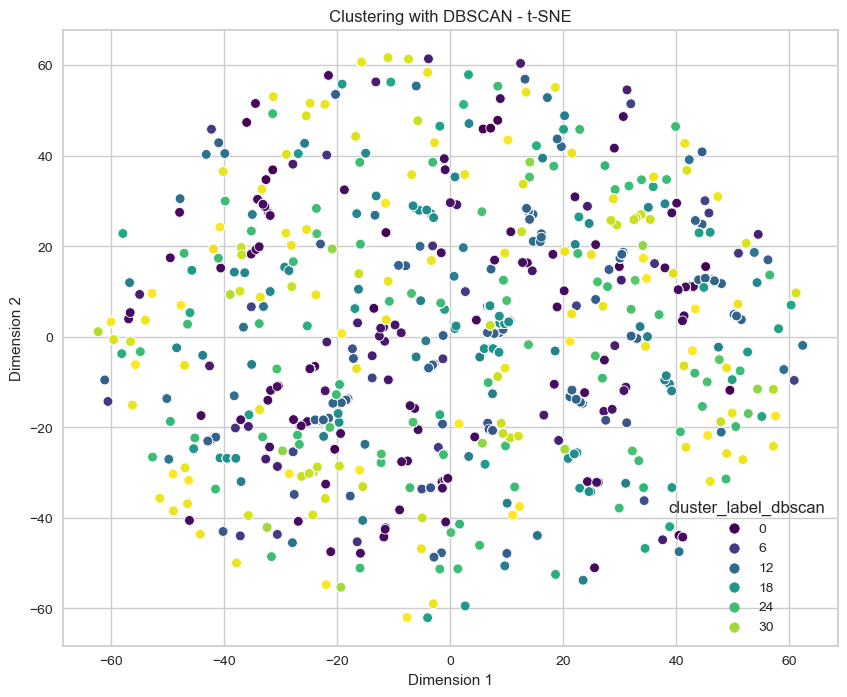

In [75]:
# Supprimer les duplicatas de l'index si nécessaire
df_new_indicators = df_new_indicators[~df_new_indicators.index.duplicated()]

# Sélectionner les colonnes à utiliser
columns = ['price', 'distance_km_customer_seller', 'duree_de_livraison', 'payment_type_encoded', 'product_category_name_encoded']

# Créer une copie du DataFrame avec les colonnes sélectionnées
df_selected = df_new_indicators[columns].copy()

# Appliquer l'algorithme DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Appliquer le clustering
labels = dbscan.fit_predict(df_selected)

# Ajouter les labels de cluster au DataFrame
df_new_indicators['cluster_label_dbscan'] = labels

# Afficher les statistiques des clusters
cluster_stats = df_new_indicators.groupby('cluster_label_dbscan').agg({
    'price': 'mean',
    'distance_km_customer_seller': 'mean',
    'duree_de_livraison': 'mean',
    'payment_type_encoded': 'mean',
    'product_category_name_encoded': 'mean',
    'customer_unique_id': 'count'
})
print(cluster_stats)

# Utiliser t-SNE pour la visualisation 2D
from sklearn.manifold import TSNE

# Sélectionner les colonnes pour t-SNE
columns_tsne = ['price', 'distance_km_customer_seller', 'duree_de_livraison', 'payment_type_encoded', 'product_category_name_encoded']
X_tsne = df_new_indicators[columns_tsne]

# Normaliser les données pour t-SNE
scaler = StandardScaler()
X_scaled_tsne = scaler.fit_transform(X_tsne)

# Appliquer t-SNE pour réduire la dimension à 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne.fit_transform(X_scaled_tsne)

# Créer un DataFrame pour les données t-SNE
df_tsne = pd.DataFrame(X_tsne_2d, columns=['Dim 1', 'Dim 2'])
df_tsne['cluster_label_dbscan'] = df_new_indicators['cluster_label_dbscan']

# Visualiser les clusters sur un scatter plot 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_tsne, x='Dim 1', y='Dim 2', hue='cluster_label_dbscan', palette='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clustering with DBSCAN - t-SNE')
plt.show()

In [2]:
pip install umap-learn

     ---------------------------------------- 88.2/88.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82814 sha256=51c7ff3f2c0bd14a9f20c7d0da43594c4fb7064ddeadebf912b4c25f60d2ebcf
  Stored in directory: c:\users\tidib\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=9df3d18ee82a1e7f4d9e0d60dd9a736645d70006aafbe2292bacfd4cce0b532f
  Stored in directory: c:\users\tidib\appdata\local\pip\cache\wheels\12\f9\4d\ec5ad1c823c710fcc4473669fdcffc8891f4bc398c841af22e
Successfully built umap-learn pynndescent
Note: you may need 

C:\Users\tidib\AppData\Local\Temp\ipykernel_18772\3015144717.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_indicators['cluster_label_dbscan'] = labels


                       price  distance_km_customer_seller  duree_de_livraison  \
cluster_label_dbscan                                                            
0                     269.00                     8.975321                 7.0   
1                      28.38                   306.764425                12.0   
2                     179.90                   144.909842                 6.0   
3                     250.00                   546.418406                13.0   
4                     250.00                   544.017753                13.0   
...                      ...                          ...                 ...   
389                    84.90                    97.460745                 7.0   
390                    84.90                    92.653797                 7.0   
391                    84.90                    91.535819                 7.0   
392                    84.90                    94.664050                 7.0   
393                    29.99

C:\Users\tidib\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
C:\Users\tidib\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
C:\Users\tidib\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
C:\Users\tidib\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed!

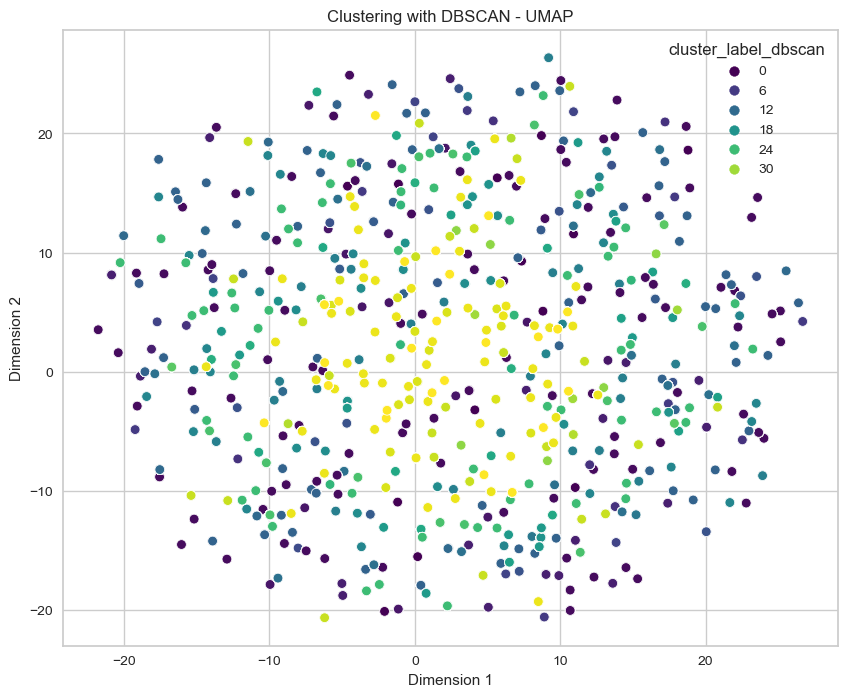

In [28]:
# Sélectionner les colonnes à utiliser
columns = ['price', 'distance_km_customer_seller', 'duree_de_livraison', 'payment_type_encoded', 'product_category_name_encoded']

# Créer une copie du DataFrame avec les colonnes sélectionnées
df_selected = df_new_indicators[columns].copy()

# Appliquer l'algorithme DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Appliquer le clustering
labels = dbscan.fit_predict(df_selected)

# Ajouter les labels de cluster au DataFrame
df_new_indicators['cluster_label_dbscan'] = labels

# Afficher les statistiques des clusters
cluster_stats = df_new_indicators.groupby('cluster_label_dbscan').agg({
    'price': 'mean',
    'distance_km_customer_seller': 'mean',
    'duree_de_livraison': 'mean',
    'payment_type_encoded': 'mean',
    'product_category_name_encoded': 'mean',
    'customer_unique_id': 'count'
})
print(cluster_stats)

# Utiliser UMAP pour la visualisation 2D
import umap.umap_ as umap

# Sélectionner les colonnes pour UMAP
columns_umap = ['price', 'distance_km_customer_seller', 'duree_de_livraison', 'payment_type_encoded', 'product_category_name_encoded']
X_umap = df_new_indicators[columns_umap]

# Normaliser les données pour UMAP
scaler = StandardScaler()
X_scaled_umap = scaler.fit_transform(X_umap)

# Appliquer UMAP pour réduire la dimension à 2D
umap = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap.fit_transform(X_scaled_umap)

# Créer un DataFrame pour les données UMAP
df_umap = pd.DataFrame(X_umap_2d, columns=['Dim 1', 'Dim 2'])
df_umap['cluster_label_dbscan'] = df_new_indicators['cluster_label_dbscan']

# Visualiser les clusters sur un scatter plot 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_umap, x='Dim 1', y='Dim 2', hue='cluster_label_dbscan', palette='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clustering with DBSCAN - UMAP')
plt.show()

In [49]:
# Compter le nombre d'échantillons dans chaque cluster
cluster_counts = df_new_indicators['cluster_label_dbscan'].value_counts()

# Afficher la distribution des clusters
print("Distribution des clusters:")
print(cluster_counts)

Distribution des clusters:
393    14256
24      3648
236     3600
298     3432
281     2860
       ...  
27         6
347        6
341        5
334        5
339        5
Name: cluster_label_dbscan, Length: 394, dtype: int64


- Calcule du coefficient de Davies-Bouldin (DBI)

In [59]:
# Compter le nombre d'échantillons dans chaque cluster
cluster_counts = df_new_indicators['cluster_label_dbscan'].value_counts()

# Afficher la distribution des clusters
print("Distribution des clusters:")
print(cluster_counts)

Coefficient de Davies-Bouldin: 0.17996392960230817


 le coefficient de Davies-Bouldin (DBI) pour évaluer la qualité des clusters obtenus à partir de l'algorithme de clustering. Ce coefficient mesure de la similarité entre les clusters, où un score plus bas indique des clusters plus compacts et bien séparés.

- Clustering avec l'algorithme Agglomerative Clustering

                        price  distance_km_customer_seller  \
cluster_label_agg                                            
0                   92.448067                   433.925210   
1                   65.120994                  1436.610914   
2                  115.134970                    57.466929   
3                  116.403946                   738.350620   
4                  267.890108                  2080.790817   

                   duree_de_livraison  payment_type_encoded  \
cluster_label_agg                                             
0                           11.517312              0.956462   
1                           14.169145              1.654275   
2                            7.352941              0.868713   
3                           12.305800              0.883128   
4                           15.529730              0.832432   

                   product_category_name_encoded  customer_unique_id  
cluster_label_agg                                   

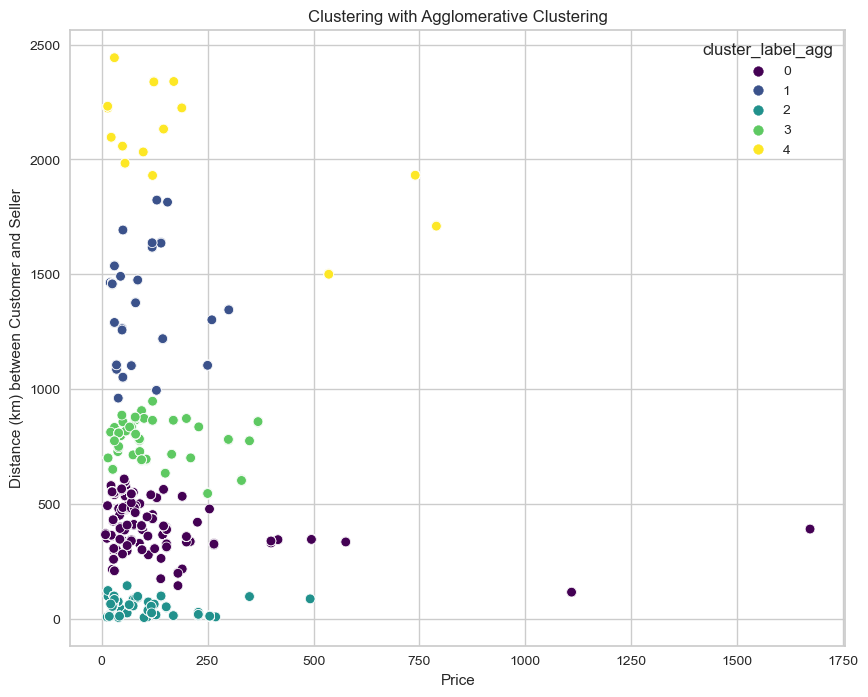

In [58]:
# Réduire la taille du DataFrame de moitié
df_half = df_new_indicators.sample(frac=0.05, random_state=42)

# Sélection des colonnes à utiliser
columns = ['price', 'distance_km_customer_seller', 'duree_de_livraison', 'payment_type_encoded', 'product_category_name_encoded']

# Créer une copie du DataFrame avec les colonnes sélectionnées
df_selected = df_half[columns].copy()

# Instancier l'algorithme AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=5)

# Appliquer le clustering
labels = agg_clustering.fit_predict(df_selected)

# Ajouter les labels de cluster au DataFrame
df_half['cluster_label_agg'] = labels

# Afficher les statistiques des clusters
cluster_stats = df_half.groupby('cluster_label_agg').agg({
    'price': 'mean',
    'distance_km_customer_seller': 'mean',
    'duree_de_livraison': 'mean',
    'payment_type_encoded': 'mean',
    'product_category_name_encoded': 'mean',
    'customer_unique_id': 'count'
})
print(cluster_stats)

# Visualiser les clusters sur un scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_half, x='price', y='distance_km_customer_seller', hue='cluster_label_agg', palette='viridis')
plt.xlabel('Price')
plt.ylabel('Distance (km) between Customer and Seller')
plt.title('Clustering with Agglomerative Clustering')
plt.savefig('Agglomerative_Clustering_N2.png')
plt.show()

### Comparaison des 3 modèles de clustering utilisés

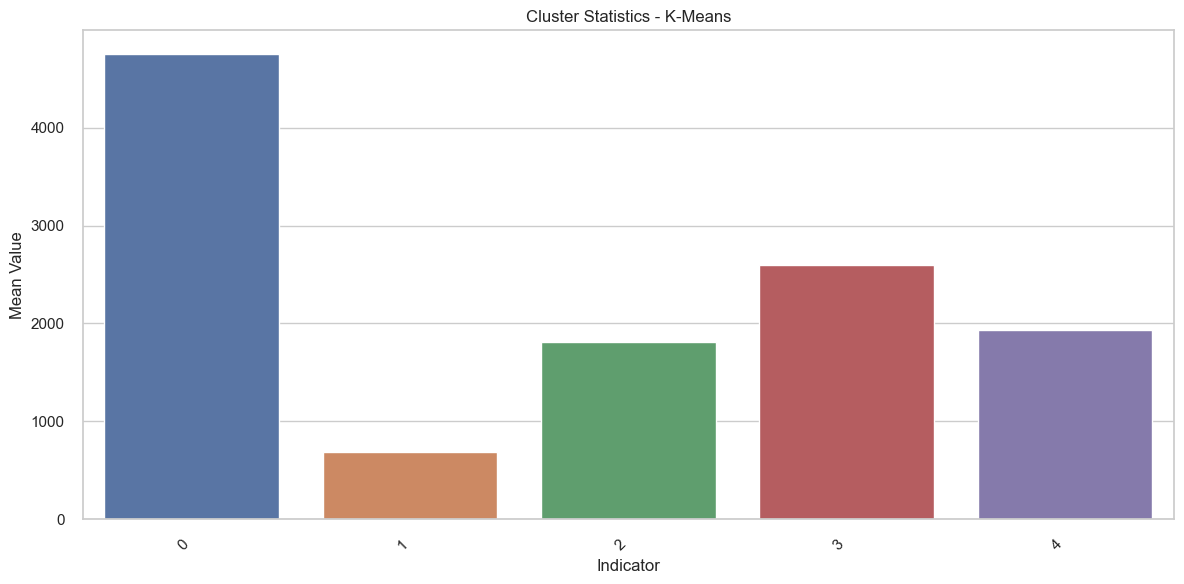

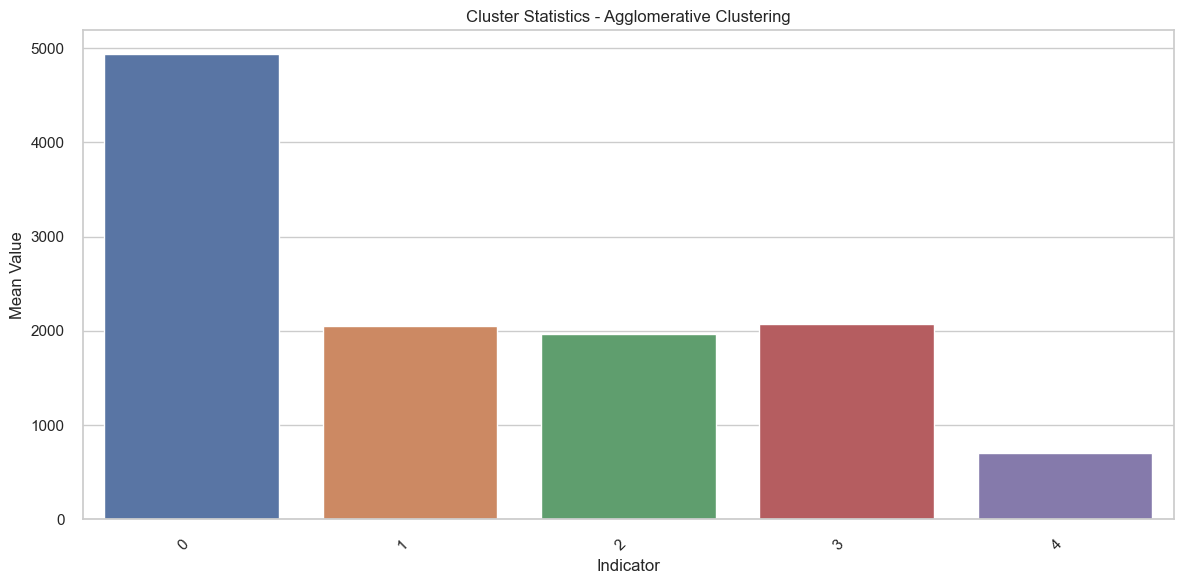

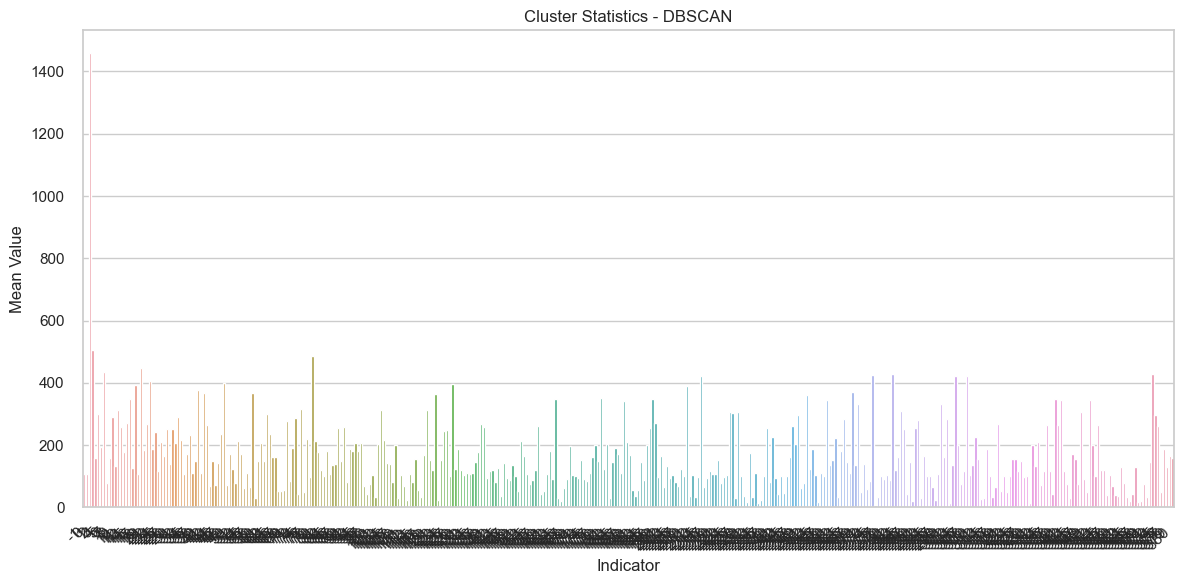

In [53]:
# Sélection des colonnes à utiliser
columns = ['price', 'distance_km_customer_seller', 'duree_de_livraison', 'payment_type_encoded', 'product_category_name_encoded']

# Sous-échantillonnage du DataFrame
df_subsampled = df_new_indicators.sample(frac=0.5, random_state=42)

# Créer une copie du DataFrame sous-échantillonné avec les colonnes sélectionnées
df_selected = df_subsampled[columns].copy()

# Initialiser les algorithmes de clustering
kmeans = KMeans(n_clusters=5)
agg_clustering = AgglomerativeClustering(n_clusters=5)



dbscan = DBSCAN(eps=0.5, min_samples=5)

# Liste des algorithmes de clustering
clustering_algorithms = [('K-Means', kmeans), ('Agglomerative Clustering', agg_clustering), ('DBSCAN', dbscan)]

# Dictionnaire pour stocker les statistiques des clusters
cluster_stats = {}

# Boucle sur les algorithmes de clustering
for name, algorithm in clustering_algorithms:
    # Appliquer le clustering
    labels = algorithm.fit_predict(df_selected)
    
    # Ajouter les labels de cluster au DataFrame sous-échantillonné
    df_subsampled[f'cluster_label_{name}'] = labels
    
    # Calculer les statistiques des clusters
    stats = df_subsampled.groupby(f'cluster_label_{name}').agg({
        'price': 'mean',
        'distance_km_customer_seller': 'mean',
        'duree_de_livraison': 'mean',
        'payment_type_encoded': 'mean',
        'product_category_name_encoded': 'mean',
        'customer_unique_id': 'count'
    })
    
    # Renommer les colonnes du tableau récapitulatif
    stats.rename(columns={
        'price': f'Mean Price',
        'distance_km_customer_seller': f'Mean Distance (km)',
        'duree_de_livraison': f'Mean Delivery Duration',
        'payment_type_encoded': f'Mean Payment Type',
        'product_category_name_encoded': f'Mean Product Category',
        'customer_unique_id': f'Count'
    }, inplace=True)
    
    # Stocker les statistiques des clusters dans le dictionnaire
    cluster_stats[name] = stats

# Plot individuel pour chaque algorithme de clustering
for name, stats in cluster_stats.items():
    # Transposer le tableau pour faciliter la visualisation
    stats = stats.T

    # Plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=stats, ci=None)
    ax.set_ylabel("Mean Value")
    ax.set_xlabel("Indicator")
    ax.set_title(f"Cluster Statistics - {name}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

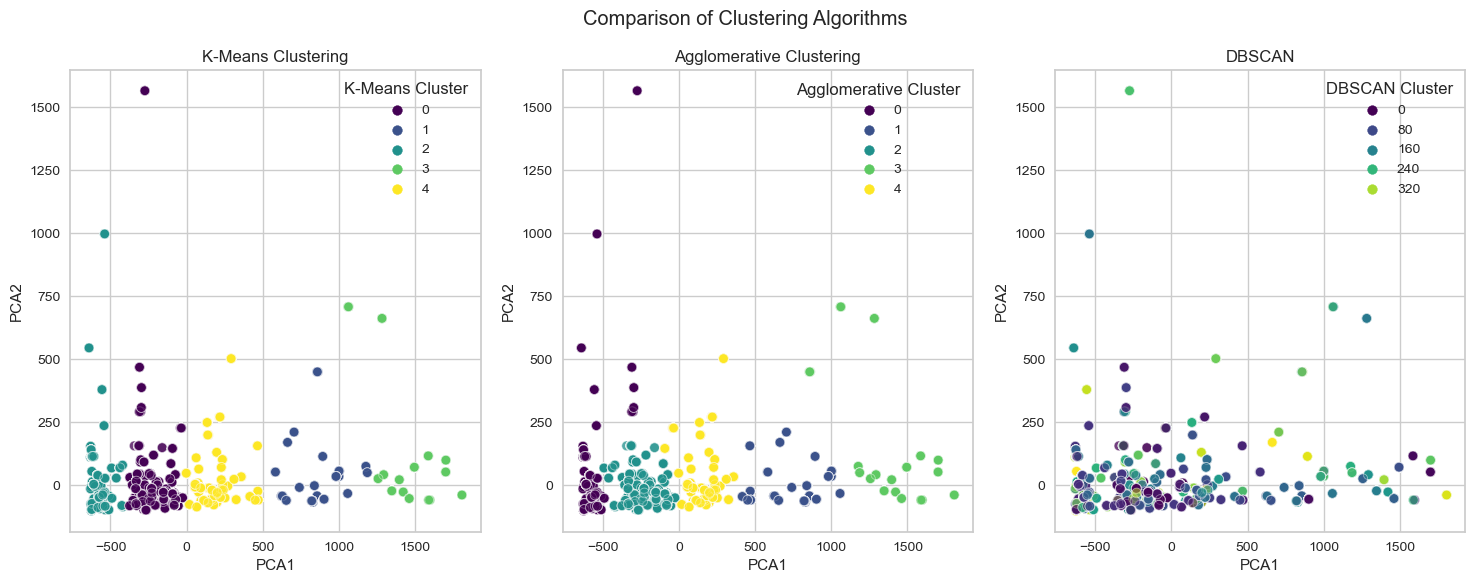

In [61]:
# Sélectionner les colonnes à utiliser pour le clustering
columns = ['price', 'distance_km_customer_seller', 'duree_de_livraison', 'payment_type_encoded', 'product_category_name_encoded']

# Réduire la taille du jeu de données par échantillonnage aléatoire
sample_data = df_new_indicators.sample(n=50000)

# Initialiser les algorithmes de clustering
kmeans = KMeans(n_clusters=5)
agg_clustering = AgglomerativeClustering(n_clusters=5)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Réduire la dimensionnalité avec PCA en 2D
pca = PCA(n_components=2)
skillsPCA_2d = pca.fit_transform(sample_data[columns])

# Ajouter les coordonnées PCA au DataFrame
sample_data['PCA1'] = skillsPCA_2d[:, 0]
sample_data['PCA2'] = skillsPCA_2d[:, 1]

# Entraîner les modèles de clustering sur les données réduites en PCA
kmeans.fit(skillsPCA_2d)
agg_cluster_labels = agg_clustering.fit_predict(skillsPCA_2d)
dbscan.fit(skillsPCA_2d)

# Ajouter les labels de cluster correspondants au DataFrame
sample_data['K-Means Cluster'] = kmeans.labels_
sample_data['Agglomerative Cluster'] = agg_cluster_labels
sample_data['DBSCAN Cluster'] = dbscan.labels_

# Créer une figure avec plusieurs sous-graphiques
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Comparaison avec K-Means
sns.scatterplot(data=sample_data, x='PCA1', y='PCA2', hue='K-Means Cluster', palette='viridis', alpha=0.5, ax=ax[0])
ax[0].set_title('K-Means Clustering')

# Comparaison avec Agglomerative Clustering
sns.scatterplot(data=sample_data, x='PCA1', y='PCA2', hue='Agglomerative Cluster', palette='viridis', alpha=0.5, ax=ax[1])
ax[1].set_title('Agglomerative Clustering')

# Comparaison avec DBSCAN
sns.scatterplot(data=sample_data, x='PCA1', y='PCA2', hue='DBSCAN Cluster', palette='viridis', alpha=0.5, ax=ax[2])
ax[2].set_title('DBSCAN')

# Titre global pour la comparaison des visualisations des algorithmes de clustering
fig.suptitle('Comparison of Clustering Algorithms')

# Afficher le graphique
plt.savefig('Comparison_of_Clustering_Algorithms.png')
plt.show()

In [117]:
df_new_indicators

,customer_unique_id,price,distance_km_customer_seller,duree_de_livraison,payment_type_encoded,product_category_name_encoded
1024,84b5012d933ff251917aa48ff80739f0,269.00,8.975321,7,1,21
1025,84b5012d933ff251917aa48ff80739f0,269.00,8.975321,7,1,21
1026,84b5012d933ff251917aa48ff80739f0,269.00,8.975321,7,1,21
1027,84b5012d933ff251917aa48ff80739f0,269.00,8.975321,7,1,21
1028,84b5012d933ff251917aa48ff80739f0,269.00,8.975321,7,1,21
...,...,...,...,...,...,...
1226713,02eedc8f54686a4ce9df86a5a4b6e30e,29.99,1538.777880,14,2,18
1226714,02eedc8f54686a4ce9df86a5a4b6e30e,29.99,1538.349687,14,2,18
1226715,02eedc8f54686a4ce9df86a5a4b6e30e,29.99,1539.080912,14,2,18
1226716,02eedc8f54686a4ce9df86a5a4b6e30e,29.99,1538.556447,14,2,18


In [65]:
df_new_indicators.to_csv('./data/df_new_indicators.csv', index=False)